In [1]:
from getpass import getuser # Libaray to copy things
from tempfile import NamedTemporaryFile, TemporaryDirectory 

import dask

from dask.distributed import Client
import multiprocessing

ncpu = multiprocessing.cpu_count()
threads = 8
nworker = ncpu // threads
print(
    f"Number of CPUs: {ncpu}, number of threads: {threads}, number of workers: {nworker}"
)
client = Client(
    processes=True, threads_per_worker=threads, n_workers=nworker, memory_limit="100GB"
)
client 

# calculation
import metpy.calc as mpcalc

# scipy
from scipy import stats
from scipy.ndimage import measurements
from scipy import ndimage
from scipy.optimize import curve_fit

# for plot
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# basic
from pathlib import Path # Object oriented libary to deal with paths
from dask.utils import format_bytes
from distributed import Client, progress, wait # Libaray to orchestrate distributed resources
import netCDF4 as nc
import numpy as np # Pythons standard array library
import xarray as xr # Libary to work with labeled n-dimensional data

# dask
import dask # Distributed data libary
import dask.distributed
import multiprocessing
from subprocess import run, PIPE
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})

Number of CPUs: 256, number of threads: 8, number of workers: 32


2024-04-02 19:55:52,623 - distributed.diskutils - INFO - Found stale lock file and directory '/home/m/m300948/ICON_AMZDEF/dask-worker-space/worker-09xh1ua7', purging
2024-04-02 19:55:52,629 - distributed.diskutils - INFO - Found stale lock file and directory '/home/m/m300948/ICON_AMZDEF/dask-worker-space/worker-4w7w7png', purging
2024-04-02 19:55:52,634 - distributed.diskutils - INFO - Found stale lock file and directory '/home/m/m300948/ICON_AMZDEF/dask-worker-space/worker-0m0stoem', purging
2024-04-02 19:55:52,639 - distributed.diskutils - INFO - Found stale lock file and directory '/home/m/m300948/ICON_AMZDEF/dask-worker-space/worker-mqpxuszb', purging
2024-04-02 19:55:52,644 - distributed.diskutils - INFO - Found stale lock file and directory '/home/m/m300948/ICON_AMZDEF/dask-worker-space/worker-dk2c4y7c', purging
2024-04-02 19:55:52,649 - distributed.diskutils - INFO - Found stale lock file and directory '/home/m/m300948/ICON_AMZDEF/dask-worker-space/worker-4ti8aao5', purging
2024

In [2]:
import Tools

Number of CPUs: 256, number of threads: 8, number of workers: 32


# Load wind data

In [6]:
topo = xr.open_mfdataset('/work/mh0731/m300948/AMDEF/REGRID_BC/amz_ori/bc_land_sso_remap.nc',parallel=True)['elevation']

In [3]:
# ctl
#Define a global pattern to find the files
###horizontal wind
glob_pattern_ua = 'ctl_daily_ua_plev_2022'
glob_pattern_va = 'ctl_daily_va_plev_2022'

## Define the paths of file 1 (dppp0016)
data_path1 = Path('/scratch/m/m300948/test_04/3d/wind')

## Collect all file names with pathlib's rglob and list compression  -- cloud liquid water 
file_ctl_ua = sorted([str(f) for f in data_path1.rglob(f'{glob_pattern_ua}*.nc')])[:]
file_ctl_va = sorted([str(f) for f in data_path1.rglob(f'{glob_pattern_va}*.nc')])[:]

In [4]:
times = ['2022-01-01','2022-12-31']
levels = ['70000','100000']
var_ua = 'ua'
var_va = 'va'
time_mean = '1MS'

ua_ctl = Tools.time_mean_model_3d(file_ctl_ua,times,levels,time_mean,var_ua,[-60,20],[-100,-20],'trop')
va_ctl = Tools.time_mean_model_3d(file_ctl_va,times,levels,time_mean,var_va,[-60,20],[-100,-20],'trop')

In [5]:
# ctl

###vertical wind
glob_pattern_wa = 'ctl_daily_wa_plev_2022'

## Define the paths of file 1 (dppp0016)
data_path1 = Path('/scratch/m/m300948/test_04/3d/vertical_w')

## Collect all file names with pathlib's rglob and list compression  -- cloud liquid water 
file_ctl_wa = sorted([str(f) for f in data_path1.rglob(f'{glob_pattern_wa}*.nc')])[:]

In [6]:
times = ['2022-01-01','2022-12-31']
var_wa = 'wa'
time_mean = '1MS'

wa_ctl = Tools.time_mean_model(file_ctl_wa,times,time_mean,var_wa,[-60,20],[-100,-20],'trop')

In [5]:
uas_ctl_mon=ua_ctl.groupby('time.month').mean('time')
vas_ctl_mon=va_ctl.groupby('time.month').mean('time')
#was_ctl_mon=wa_ctl.groupby('time.month').mean('time')

In [6]:
# def
glob_pattern_ua = 'def_daily_ua_plev_2022'
glob_pattern_va = 'def_daily_va_plev_2022'

## Define the paths of file 1 (dppp0016)
data_path1 = Path('/scratch/m/m300948/def_100/3d/wind')

## Collect all file names with pathlib's rglob and list compression  -- cloud liquid water 
file_def_ua = sorted([str(f) for f in data_path1.rglob(f'{glob_pattern_ua}*.nc')])[:]
file_def_va = sorted([str(f) for f in data_path1.rglob(f'{glob_pattern_va}*.nc')])[:]

In [7]:
times = ['2022-01-01','2022-12-31']
levels = ['70000','100000']
var_ua = 'ua'
var_va = 'va'
time_mean = '1MS'

ua_def = Tools.time_mean_model_3d(file_def_ua,times,levels,time_mean,var_ua,[-60,20],[-100,-20],'trop')
va_def = Tools.time_mean_model_3d(file_def_va,times,levels,time_mean,var_va,[-60,20],[-100,-20],'trop')

In [10]:
# def
glob_pattern_wa = 'def_daily_wa_plev_2022'

## Define the paths of file 1 (dppp0016)
data_path1 = Path('/scratch/m/m300948/def_100/3d/vertical_w')

## Collect all file names with pathlib's rglob and list compression  -- cloud liquid water 
file_def_wa = sorted([str(f) for f in data_path1.rglob(f'{glob_pattern_wa}*.nc')])[:]

In [11]:
times = ['2022-01-01','2022-12-31']
var_wa = 'wa'
time_mean = '1MS'

wa_def = Tools.time_mean_model(file_def_wa,times,time_mean,var_wa,[-60,20],[-100,-20],'trop')

In [8]:
# def 
uas_def_mon = ua_def.groupby('time.month').mean('time')
vas_def_mon = va_def.groupby('time.month').mean('time')
#was_def_mon = wa_def.groupby('time.month').mean('time')

In [9]:
xarray_names = ['uas_ctl_mon','vas_ctl_mon','uas_def_mon','vas_def_mon']

for name in xarray_names:
    xarray_data = globals()[name]
    xarray_data_wet = xarray_data.where(xarray_data.month.isin([1,2,12]), drop=True).mean("month")
    xarray_data_dry = xarray_data.where(xarray_data.month.isin([7,8,9]), drop=True).mean("month")
    #xarray_data_trans = xarray_data.where(xarray_data.month.isin([3,4,5,10,11]), drop=True).mean("month")
    xarray_data_am = xarray_data.where(xarray_data.month.isin([5,6]), drop=True).mean("month")
    #xarray_data_on = xarray_data.where(xarray_data.month.isin([10,11]), drop=True).mean("month")
        
    new_name_wet = name + '_wet'
    new_name_dry = name + '_dry'
    #new_name_trans = name + '_trans'
    new_name_am = name + '_am'
    #new_name_on = name + '_on'
        
    globals()[new_name_wet] = xarray_data_wet
    globals()[new_name_dry] = xarray_data_dry
    #globals()[new_name_trans] = xarray_data_trans
    globals()[new_name_am] = xarray_data_am
    #globals()[new_name_on] = xarray_data_on

In [ ]:
xarray_names = ['was_ctl_mon','was_def_mon']

for name in xarray_names:
    xarray_data = globals()[name]
    xarray_data_wet = xarray_data.where(xarray_data.month.isin([1,2,12]), drop=True).mean("month")
    xarray_data_dry = xarray_data.where(xarray_data.month.isin([7,8,9]), drop=True).mean("month")
        
    new_name_wet = name + '_wet'
    new_name_dry = name + '_dry'
        
    globals()[new_name_wet] = xarray_data_wet
    globals()[new_name_dry] = xarray_data_dry

_levels of jet (average 850-700hPa)_

In [10]:
xarray_names = ['uas_ctl_mon_wet','uas_ctl_mon_dry','vas_ctl_mon_wet','vas_ctl_mon_dry',
                'uas_def_mon_wet','uas_def_mon_dry','vas_def_mon_wet','vas_def_mon_dry']

for name in xarray_names:
    xarray_data = globals()[name]
    xarray_data_new = xarray_data.where(xarray_data.plev.isin([85000,70000]), drop=True).mean("plev")
        
    new_name = name + '_jet'
        
    globals()[new_name] = xarray_data_new

In [15]:
xarray_names = ['was_ctl_mon_wet','was_ctl_mon_dry','was_def_mon_wet','was_def_mon_dry']

for name in xarray_names:
    xarray_data = globals()[name]
    xarray_data_new = xarray_data.where(xarray_data.plev.isin([85000,70000,60000]), drop=True).mean("plev")
        
    new_name = name + '_jet'
        
    globals()[new_name] = xarray_data_new

_average speed over the amazon basin_

In [16]:
# wet
speed_ctl_wet = np.sqrt(uas_ctl_mon_wet**2 + vas_ctl_mon_wet**2)
speed_def_wet = np.sqrt(uas_def_mon_wet**2 + vas_def_mon_wet**2)
# dry
speed_ctl_dry = np.sqrt(uas_ctl_mon_dry**2 + vas_ctl_mon_dry**2)
speed_def_dry = np.sqrt(uas_def_mon_dry**2 + vas_def_mon_dry**2)

In [17]:
# Amazon masking (wind speed)
dset_bd = xr.open_dataset('/work/mh0731/m300948/AMDEF/REGRID_BC/masking_files/AMAZON_Biome.nc')
AMZ_BD = dset_bd.AMAZON_BIOMES
ABinterp_biome_icon = AMZ_BD.interp(latitude=speed_ctl_wet.lat, longitude=speed_ctl_wet.lon)

speed_ctl_wet_amz = speed_ctl_wet.where(ABinterp_biome_icon==0, np.nan).sel(lon=slice(-90,-30), lat=slice(-30,20)).mean(('lat','lon')) # masking into Amazon
speed_def_wet_amz = speed_def_wet.where(ABinterp_biome_icon==0, np.nan).sel(lon=slice(-90,-30), lat=slice(-30,20)).mean(('lat','lon')) # masking into Amazon
speed_ctl_dry_amz = speed_ctl_dry.where(ABinterp_biome_icon==0, np.nan).sel(lon=slice(-90,-30), lat=slice(-30,20)).mean(('lat','lon')) # masking into Amazon
speed_def_dry_amz = speed_def_dry.where(ABinterp_biome_icon==0, np.nan).sel(lon=slice(-90,-30), lat=slice(-30,20)).mean(('lat','lon')) # masking into Amazon

In [46]:
# Amazon masking (wind speed)
dset_bd = xr.open_dataset('/work/mh0731/m300948/AMDEF/REGRID_BC/masking_files/AMAZON_Biome.nc')
AMZ_BD = dset_bd.AMAZON_BIOMES
ABinterp_biome_icon = AMZ_BD.interp(latitude=was_ctl_mon_wet.lat, longitude=was_ctl_mon_wet.lon)

was_ctl_mon_wet_amz = was_ctl_mon_wet.where(ABinterp_biome_icon==0, np.nan).sel(lon=slice(-90,-30), lat=slice(-30,20)).mean(('lat','lon')) # masking into Amazon
was_def_mon_wet_amz = was_def_mon_wet.where(ABinterp_biome_icon==0, np.nan).sel(lon=slice(-90,-30), lat=slice(-30,20)).mean(('lat','lon')) # masking into Amazon
was_ctl_mon_dry_amz = was_ctl_mon_dry.where(ABinterp_biome_icon==0, np.nan).sel(lon=slice(-90,-30), lat=slice(-30,20)).mean(('lat','lon')) # masking into Amazon
was_def_mon_dry_amz = was_def_mon_dry.where(ABinterp_biome_icon==0, np.nan).sel(lon=slice(-90,-30), lat=slice(-30,20)).mean(('lat','lon')) # masking into Amazon

In [144]:
# Amazon masking (u and v speed)
dset_bd = xr.open_dataset('/work/mh0731/m300948/AMDEF/REGRID_BC/masking_files/AMAZON_Biome.nc')
AMZ_BD = dset_bd.AMAZON_BIOMES
ABinterp_biome_icon = AMZ_BD.interp(latitude=uas_ctl_mon_wet.lat, longitude=uas_ctl_mon_wet.lon)

# wet
uas_ctl_wet_amz = uas_ctl_mon_wet.where(ABinterp_biome_icon==0, np.nan).sel(lon=slice(-90,-30), lat=slice(-30,20)).mean(('lat','lon')) # masking into Amazon
vas_ctl_wet_amz = vas_ctl_mon_wet.where(ABinterp_biome_icon==0, np.nan).sel(lon=slice(-90,-30), lat=slice(-30,20)).mean(('lat','lon')) # masking into Amazon
uas_def_wet_amz = uas_def_mon_wet.where(ABinterp_biome_icon==0, np.nan).sel(lon=slice(-90,-30), lat=slice(-30,20)).mean(('lat','lon')) # masking into Amazon
vas_def_wet_amz = vas_def_mon_wet.where(ABinterp_biome_icon==0, np.nan).sel(lon=slice(-90,-30), lat=slice(-30,20)).mean(('lat','lon')) # masking into Amazon

# dry
uas_ctl_dry_amz = uas_ctl_mon_dry.where(ABinterp_biome_icon==0, np.nan).sel(lon=slice(-90,-30), lat=slice(-30,20)).mean(('lat','lon')) # masking into Amazon
vas_ctl_dry_amz = vas_ctl_mon_dry.where(ABinterp_biome_icon==0, np.nan).sel(lon=slice(-90,-30), lat=slice(-30,20)).mean(('lat','lon')) # masking into Amazon
uas_def_dry_amz = uas_def_mon_dry.where(ABinterp_biome_icon==0, np.nan).sel(lon=slice(-90,-30), lat=slice(-30,20)).mean(('lat','lon')) # masking into Amazon
vas_def_dry_amz = vas_def_mon_dry.where(ABinterp_biome_icon==0, np.nan).sel(lon=slice(-90,-30), lat=slice(-30,20)).mean(('lat','lon')) # masking into Amazon

In [102]:
xarray_names = ['speed_ctl_wet','speed_def_wet','speed_ctl_dry','speed_def_dry']

for name in xarray_names:
    xarray_data = globals()[name]
    xarray_data_new = xarray_data.where(((xarray_data.lat>=-15) & (xarray_data.lat<=5)) & 
                                        ((xarray_data.lon>=-75) & (xarray_data.lon<=-40)),drop=True).mean(('lat','lon'))
        
    new_name = name + '_avg'
        
    globals()[new_name] = xarray_data_new

_vertical profile_

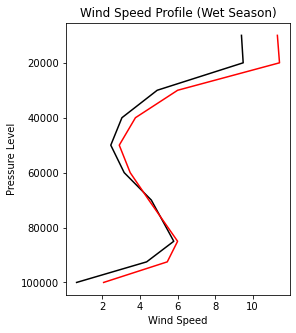

In [19]:
import matplotlib.pyplot as plt
import xarray as xr

# Assuming you have an xarray dataset called 'ds' with a 'pressure' dimension and a 'humidity' variable
fig  = plt.figure(figsize=(4, 5))

# Extract the pressure and humidity data
pressure_levels = speed_ctl_wet_amz['plev'].values
ctl_values = speed_ctl_wet_amz.values
def_values = speed_def_wet_amz.values

# Create a vertical profile plot with pressure on the y-axis and humidity on the x-axis
plt.plot(ctl_values, pressure_levels,color='black')
plt.plot(def_values, pressure_levels,color='red')

# Set labels and title
plt.xlabel('Wind Speed')
plt.ylabel('Pressure Level')
plt.title('Wind Speed Profile (Wet Season)')

# Invert the y-axis (pressure) so that higher values are at the top
plt.gca().invert_yaxis()
#plt.xscale('log')
# Show the plot
plt.show()

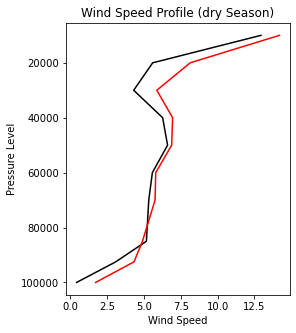

In [20]:
import matplotlib.pyplot as plt
import xarray as xr

# Assuming you have an xarray dataset called 'ds' with a 'pressure' dimension and a 'humidity' variable
fig  = plt.figure(figsize=(4, 5))

# Extract the pressure and humidity data
pressure_levels = speed_ctl_dry_amz['plev'].values
ctl_values = speed_ctl_dry_amz.values
def_values = speed_def_dry_amz.values

# Create a vertical profile plot with pressure on the y-axis and humidity on the x-axis
plt.plot(ctl_values, pressure_levels,color='black')
plt.plot(def_values, pressure_levels,color='red')

# Set labels and title
plt.xlabel('Wind Speed')
plt.ylabel('Pressure Level')
plt.title('Wind Speed Profile (dry Season)')

# Invert the y-axis (pressure) so that higher values are at the top
plt.gca().invert_yaxis()
#plt.xscale('log')
# Show the plot
plt.show()

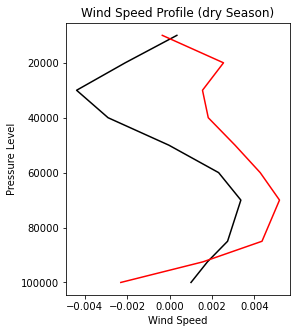

In [49]:
import matplotlib.pyplot as plt
import xarray as xr

# Assuming you have an xarray dataset called 'ds' with a 'pressure' dimension and a 'humidity' variable
fig  = plt.figure(figsize=(4, 5))

# Extract the pressure and humidity data
pressure_levels = was_ctl_mon_dry_amz['plev'].values
ctl_values = was_ctl_mon_dry_amz.values
def_values = was_def_mon_dry_amz.values

# Create a vertical profile plot with pressure on the y-axis and humidity on the x-axis
plt.plot(ctl_values, pressure_levels,color='black')
plt.plot(def_values, pressure_levels,color='red')

# Set labels and title
plt.xlabel('Wind Speed')
plt.ylabel('Pressure Level')
plt.title('Wind Speed Profile (dry Season)')

# Invert the y-axis (pressure) so that higher values are at the top
plt.gca().invert_yaxis()
#plt.xscale('log')
# Show the plot
plt.show()

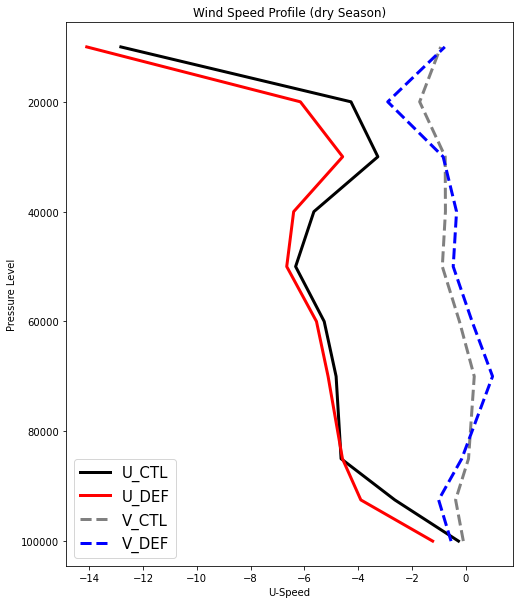

In [155]:
import matplotlib.pyplot as plt
import xarray as xr

# Assuming you have an xarray dataset called 'ds' with a 'pressure' dimension and a 'humidity' variable
fig  = plt.figure(figsize=(8, 10))

# Extract the pressure and humidity data
pressure_levels = uas_ctl_dry_amz['plev'].values
u_ctl_values = uas_ctl_dry_amz.values
u_def_values = uas_def_dry_amz.values
v_ctl_values = vas_ctl_dry_amz.values
v_def_values = vas_def_dry_amz.values

# Create a vertical profile plot with pressure on the y-axis and humidity on the x-axis
plt.plot(u_ctl_values, pressure_levels,color='black',linewidth=3,label='U_CTL')
plt.plot(u_def_values, pressure_levels,color='red',linewidth=3,label='U_DEF')
plt.plot(v_ctl_values, pressure_levels,color='grey',ls='--',linewidth=3,label='V_CTL')
plt.plot(v_def_values, pressure_levels,color='blue',ls='--',linewidth=3,label='V_DEF')

# Set labels and title
plt.xlabel('U-Speed')
plt.ylabel('Pressure Level')
plt.title('Wind Speed Profile (dry Season)')

# Invert the y-axis (pressure) so that higher values are at the top
plt.gca().invert_yaxis()
plt.legend(fontsize=15)
#plt.xscale('log')
# Show the plot
plt.show()

### plot wind on each level on the map

In [61]:
def plot_windvector_multi(data, colormap, extend, varmin, varmax, space, cb_title,
                    dset_uas, dset_vas, q_interval, scale, width, x_place, y_place, color,
                    lat_min, lat_max, lon_min, lon_max, title):
    
    num_times = dset_uas.shape[0]
    
    proj = ccrs.PlateCarree(central_longitude=180) # Create Mollweide projections
    
    minlon = lon_min + 5 + 180 #on
    maxlon = lon_max - 5 + 180 #on
    
    fig, axs = plt.subplots(nrows=num_times, ncols=1, figsize=(6, 6*num_times), subplot_kw={'projection': proj}) # horizontal, vertical

    for i in range(num_times):
        dset_bd = xr.open_dataset('/work/mh0731/m300948/AMDEF/REGRID_BC/masking_files/AMAZON_Biome.nc')
        AMZ_BD = dset_bd.AMAZON_BIOMES
        
        ax = axs[i]
        ax.set_extent([minlon,maxlon,lat_min+5,lat_max-5],proj) #on
        ax.coastlines(resolution='50m', linewidth=1.5, color='black')
        gl = ax.gridlines(draw_labels=True, linewidth=1.0, color='lightgrey',
                        xlocs=range(-180,180,30), ylocs=range(-90,90,30), 
                      transform=ccrs.PlateCarree())
        gl.xlabels_top = False
        gl.ylabels_left = False
        gl.xlines = False
        gl.ylines = False
    
        ## plot data
        plot = data.isel(plev=i).plot(
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      cmap=colormap,
                      vmin=varmin[i],
                      vmax=varmax[i],
                     # cbar_kwargs={'label': 'Surface Temperature [K]',
                     #              'extend': 'both',
                     #              'shrink': .5,
                     #              'orientation': 'horizontal'},
                      add_colorbar=True
                     )
        bounds = np.linspace(varmin[i],varmax[i], space[i])
        cb = plt.colorbar(plot, orientation="horizontal", fraction=0.05, pad=0.10, extend=extend,ticks=bounds, boundaries=bounds)
        #cb.ax.tick_params(labelsize=25)
        #cb.ax.set_xticklabels(bounds,rotation=270)
        #cb.set_label(label=cb_title, size=25)
    
        vplot=ax.quiver(dset_uas.lon.values[::q_interval], dset_uas.lat.values[::q_interval], 
                    dset_uas.isel(plev=i).values[::q_interval,::q_interval], #.isel(time=time).ua
                    dset_vas.isel(plev=i).values[::q_interval,::q_interval], 
                    scale_units='xy',
                    scale= scale, #3.0
                    width= width,
                    angles='xy',
                    color=color,
                    transform=ccrs.PlateCarree())
        ax.quiverkey(vplot, X= x_place, Y=y_place, U= 5, label=r'$5 \frac{m}{s}$', labelpos='E',coordinates='figure')
        ax.set_title(title, y=1.1, fontsize=25)
    
        kw = {'levels':[-1], 'colors':['red'], 'linestyles':['solid']}
        ax.set_title(f"Time: {i}")
        ax.set_xlabel("Longitude")
        ax.set_ylabel("Latitude")
        
        kw = {'levels':[-1], 'colors':['red'], 'linestyles':['solid']}
        
        plot_bd = AMZ_BD.plot.contour( 
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      **kw
                     )

    plt.tight_layout()
    plt.show()

In [62]:
def plot_windvector(dset_uas, dset_vas, q_interval, scale, width, x_place, y_place, color,
                    lat_min, lat_max, lon_min, lon_max, title):
    
    proj = ccrs.PlateCarree(central_longitude=180) # Create Mollweide projections
    
    minlon = lon_min + 5 + 180 #on
    maxlon = lon_max - 5 + 180 #on
    
    fig, ax = plt.subplots(figsize=(6, 8), subplot_kw={'projection': proj}) # horizontal, vertical

    dset_bd = xr.open_dataset('/work/mh0731/m300948/AMDEF/REGRID_BC/masking_files/AMAZON_Biome.nc')
    AMZ_BD = dset_bd.AMAZON_BIOMES
        
    ax.set_extent([minlon,maxlon,lat_min+5,lat_max-5],proj) #on
    ax.coastlines(resolution='50m', linewidth=1.5, color='black')
    gl = ax.gridlines(draw_labels=True, linewidth=1.0, color='lightgrey',
                        xlocs=range(-180,180,10), ylocs=range(-90,90,10), 
                      transform=ccrs.PlateCarree())
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style, gl.ylabel_style = {'fontsize': 20}, {'fontsize': 20}
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xlines = False
    gl.ylines = False
    vplot=ax.quiver(dset_uas.lon.values[::q_interval], dset_uas.lat.values[::q_interval], 
                    dset_uas.values[::q_interval,::q_interval], #.isel(time=time).ua
                    dset_vas.values[::q_interval,::q_interval], 
                    scale_units='xy',
                    scale= scale, #3.0
                    width= width,
                    angles='xy',
                    color=color,
                    transform=ccrs.PlateCarree())
    ax.quiverkey(vplot, X= x_place, Y=y_place, U= 5, label=r'$5 \frac{m}{s}$', labelpos='E',coordinates='figure')
    ax.set_title(title, y=1.1, fontsize=25)
    
    kw = {'levels':[-1], 'colors':['red'], 'linestyles':['solid']}
    ax.set_title(f"Time")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
        
    kw = {'levels':[-1], 'colors':['red'], 'linestyles':['solid']}
        
    plot_bd = AMZ_BD.plot.contour( 
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      **kw
                     )
    fig.savefig('./wind100_diff_dry.png', transparent=True)
    plt.tight_layout()
    plt.show()

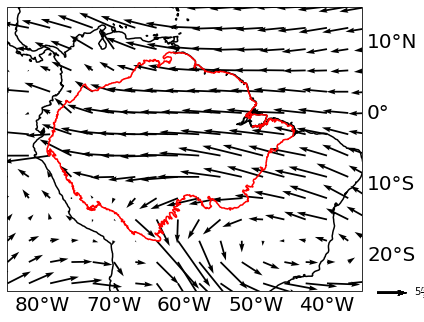

In [17]:
# SA (-60, 20, -100, -15), AMB (-30, 20, -90, -30)
plot_windvector(uas_ctl_mon_dry.isel(plev=1), vas_ctl_mon_dry.isel(plev=1), 30, 1.2, 0.005, 0.95, 0.25, 'black',
                     -30, 20, -90, -30, 'wind') 

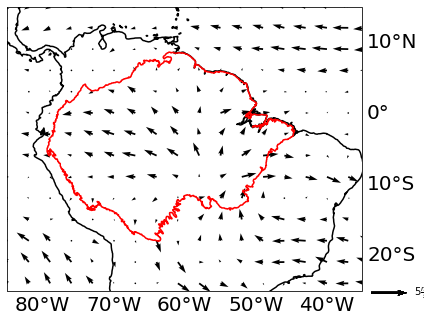

In [18]:
plot_windvector(uas_def_mon_dry.isel(plev=1)-uas_ctl_mon_dry.isel(plev=1), vas_def_mon_dry.isel(plev=1)-vas_ctl_mon_dry.isel(plev=1), 30, 1.0, 0.005,  0.95, 0.25, 'black',
                     -30, 20, -90, -30, 'wind') 

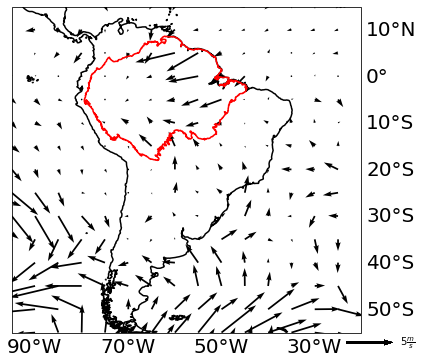

In [51]:
plot_windvector(uas_def_mon_trans.sel(plev=100000)-uas_ctl_mon_trans.sel(plev=100000), vas_def_mon_trans.sel(plev=100000)-vas_ctl_mon_trans.sel(plev=100000), 50, 0.5, 0.005, 0.92, 0.20, 'black',
                    -60, 20, -100, -15, 'wind') 

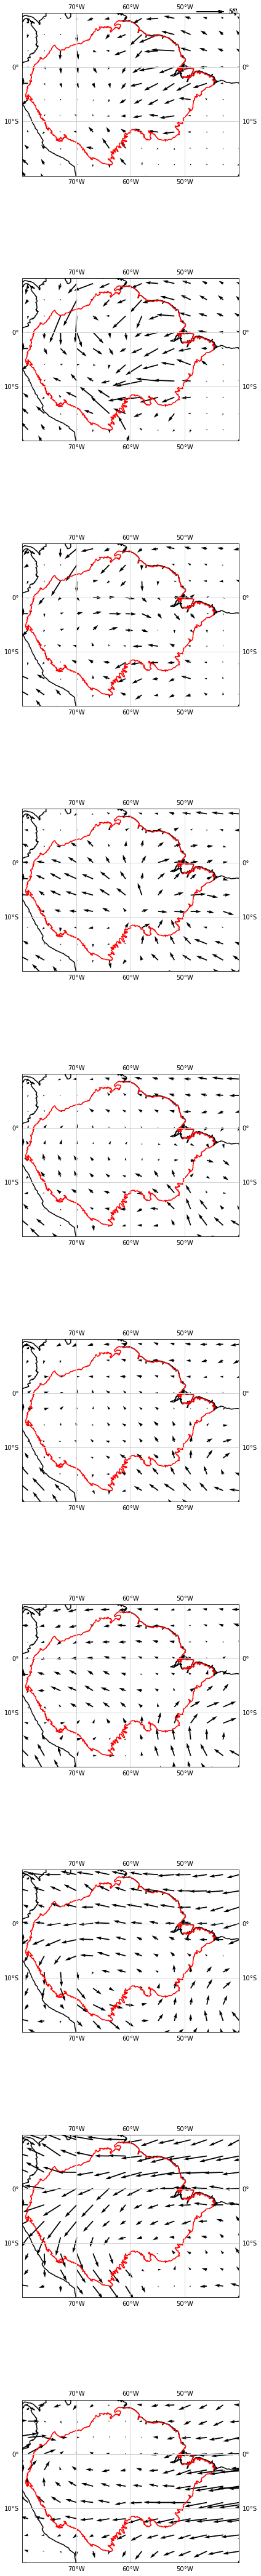

In [32]:
plot_windvector_multi(uas_def_mon_dry-uas_ctl_mon_dry, vas_def_mon_dry-vas_ctl_mon_dry, 30, 1.0, 0.005, 0.85, 0.98, 'black',
                    -25, 15, -85, -35, 'wind') 

## Zonal mean of w profile

_zonel mean_

In [15]:
# Zonal mean - Horizontal wind (lat: -40 - 10 // lon: -80 - -50)
xarray_names = ['uas_ctl_mon_wet','uas_ctl_mon_dry','vas_ctl_mon_wet','vas_ctl_mon_dry',
                'uas_def_mon_wet','uas_def_mon_dry','vas_def_mon_wet','vas_def_mon_dry'] 

for name in xarray_names:
    xarray_data = globals()[name]
    xarray_data_new = xarray_data.where(((xarray_data.lat>=-20) & (xarray_data.lat<=20)) & 
                                        ((xarray_data.lon>=-80) & (xarray_data.lon<=-60)),drop=True).mean('lon')
        
    new_name = name + '_zm'
        
    globals()[new_name] = xarray_data_new

In [16]:
# Zonal mean - Vertical wind
xarray_names = ['was_ctl_mon_wet','was_ctl_mon_dry','was_def_mon_wet','was_def_mon_dry']

for name in xarray_names:
    xarray_data = globals()[name]
    xarray_data_new = xarray_data.where(((xarray_data.lat>=-20) & (xarray_data.lat<=20)) & 
                                        ((xarray_data.lon>=-80) & (xarray_data.lon<=-60)),drop=True).mean('lon')
        
    new_name = name + '_zm'
        
    globals()[new_name] = xarray_data_new

_Vertical wind to Omega_

In [ ]:
# convert W to omega: omega = -rho * g * w [ms-1 to Pa min-1]
rho = 1
g = 9.8

wet_omega_ctl_mean_sel = - wet_was_ctl_mean_sel * rho * g * 60
dry_omega_ctl_mean_sel = - dry_was_ctl_mean_sel * rho * g * 60

In [32]:
# convert W to omega: omega = -rho * g * w [ms-1 to Pa min-1]
wet_omega_def_mean_sel = - wet_was_def_mean_sel * rho * g * 60
dry_omega_def_mean_sel = - dry_was_def_mean_sel * rho * g * 60

In [20]:
def calculate_density(temperature,pressure):
    Rd = 287 ##J K-1 Kg-1 
    rho = pressure/(Rd*temperature)
    return rho

In [21]:
def calculate_omega(temperature,pressure,vertical_velocity):
    rho = calculate_density(temperature,pressure)
    g = 9.81 ###m s-2
    omega = -g*rho*vertical_velocity
    return omega.compute()

In [17]:
BuRd_new = Tools.colormap_create('RdBu_r',21,10,11)

In [18]:
def colormap_create_wowhite(cmap, cnumber):
    get_cmap = cm.get_cmap(cmap,cnumber) 
    cmap_edit = get_cmap(np.linspace(0,1,cnumber))
    cmap_new = matplotlib.colors.ListedColormap(cmap_edit)
    return cmap_new

In [19]:
viridis_new = colormap_create_wowhite('viridis',21)

_Plotting the vertical wind profile_

In [78]:
vas_ctl_mon_wet_zm 

<xarray.DataArray 'va' (plev: 19, lat: 300)>
array([[-0.8622825 , -0.89131665, -0.90290743, ..., -1.1197228 ,
        -1.1709813 , -1.2800918 ],
       [-2.4286907 , -2.4708507 , -2.4845505 , ..., -1.2007134 ,
        -1.1881317 , -1.1888497 ],
       [-2.712969  , -2.745286  , -2.7887387 , ..., -0.5228979 ,
        -0.5220053 , -0.45055142],
       ...,
       [-0.04321276, -0.06490126, -0.08890904, ...,  0.07753003,
         0.08596683,  0.09251375],
       [ 0.06276023,  0.07299983,  0.06931435, ...,  0.01692576,
         0.04056733,  0.05740117],
       [ 0.80127263,  0.8362472 ,  0.8536271 , ...,  2.412861  ,
         2.464838  ,  2.5029123 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -19.95 -19.85 -19.75 -19.65 ... 9.65 9.75 9.85 9.95
  * plev     (plev) float64 1e+05 9.5e+04 9e+04 8.5e+04 ... 3e+03 1e+03 100.0

In [33]:
lvls = loc.tick_values(uas_ctl_mon_dry_zm.values[:,::20].min(), uas_ctl_mon_dry_zm.values[:,::20].max()) 
print(lvls.shape)

(8,)


In [28]:
# Difference 
wet_uas_diff = uas_def_mon_wet_zm - uas_ctl_mon_wet_zm #u dry
wet_vas_diff = vas_def_mon_wet_zm - vas_ctl_mon_wet_zm #v dry
wet_was_diff = was_def_mon_wet_zm - was_ctl_mon_wet_zm #w dry

dry_uas_diff = uas_def_mon_dry_zm - uas_ctl_mon_dry_zm #u wet
dry_vas_diff = vas_def_mon_dry_zm - vas_ctl_mon_dry_zm #v wet
dry_was_diff = was_def_mon_dry_zm - was_ctl_mon_dry_zm #w wet

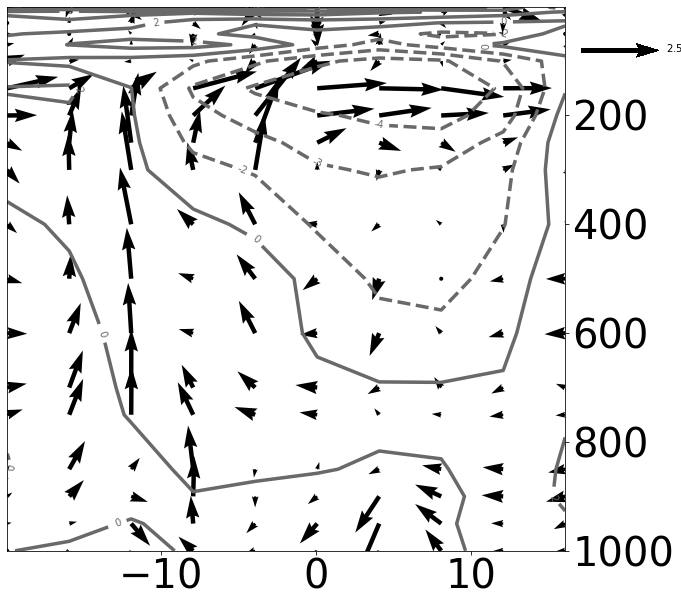

In [36]:
# min/max for contour line
import matplotlib.ticker
loc = matplotlib.ticker.MaxNLocator(7)
lvls = loc.tick_values(wet_uas_diff.values[:,::40].min(), wet_uas_diff.values[:,::40].max()) # [X,Y]
latitude = wet_was_diff['lat'][::40] 
pressure_level = wet_was_diff['plev'] 

# plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.invert_yaxis()
plot=ax.quiver(latitude, pressure_level/100, 
                    wet_vas_diff.values[:,::40], 
                    -wet_was_diff.values[:,::40]*60*100, 
                    scale_units='xy',
                    scale= 0.5, #3.0
                    width=0.008,
                    angles='xy', zorder=2)
ct = ax.contour(latitude, pressure_level/100, wet_uas_diff.values[:,::40], negative_linestyle='dashed', colors='dimgrey',linewidths=3.5)#levels=np.arange(-5,5,1), fontsize=25, 
              #  linestyles=np.where(lvls >= 0, "-", "--"), colors=np.where(lvls >=0, 'black', 'red'), linewidths=3.5)
ax.quiverkey(plot, X= 1.03, Y=0.82, U= 2.5, label=r'$2.5 \frac{m}{s}$', labelpos='E',coordinates='figure')

ct.clabel(fmt='%2.0f')
ax.yaxis.tick_right() 
ax.tick_params(labelsize=40)

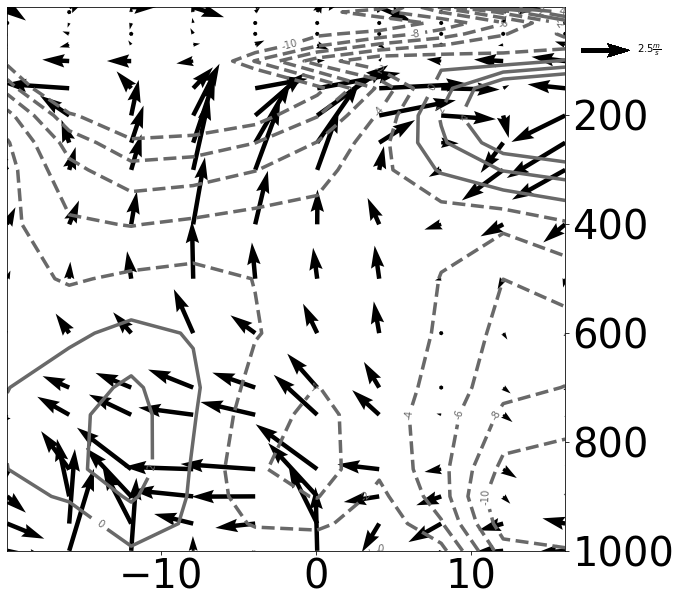

In [40]:
# min/max for contour line
import matplotlib.ticker
loc = matplotlib.ticker.MaxNLocator(7)
lvls = loc.tick_values(uas_ctl_mon_wet_zm.values[:,::40].min(), uas_ctl_mon_wet_zm.values[:,::40].max()) # [X,Y]
latitude = uas_ctl_mon_wet_zm['lat'][::40] 
pressure_level = uas_ctl_mon_wet_zm['plev'] 

# plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.invert_yaxis()
plot=ax.quiver(latitude, pressure_level/100, 
                    vas_ctl_mon_wet_zm.values[:,::40], 
                    -was_ctl_mon_wet_zm.values[:,::40]*60*100, 
                    scale_units='xy',
                    scale= 0.8, #3.0
                    width=0.008,
                    angles='xy', zorder=2)
ct = ax.contour(latitude, pressure_level/100, uas_ctl_mon_wet_zm.values[:,::40], negative_linestyle='dashed', colors='dimgrey',linewidths=3.5, levels= np.arange(-10,5,2))#levels=np.arange(-5,5,1), fontsize=25, 
              #  linestyles=np.where(lvls >= 0, "-", "--"), colors=np.where(lvls >=0, 'black', 'red'), linewidths=3.5)
ax.quiverkey(plot, X= 0.99, Y=0.82, U= 2.5, label=r'$2.5 \frac{m}{s}$', labelpos='E',coordinates='figure')

ct.clabel(fmt='%2.0f')
ax.yaxis.tick_right() 
ax.tick_params(labelsize=40)

## Load Specific Humidity

In [3]:
#Define a global pattern to find the files
###cloud liquid water 
glob_pattern_3d1 = 'ctl_daily_hus_plev_2022'
## Define the paths of file 1 (dppp0016)
data_path1 = Path('/scratch/m/m300948/test_04/3d/hus')
## Collect all file names with pathlib's rglob and list compression  -- cloud liquid water 
file_icon = sorted([str(f) for f in data_path1.rglob(f'{glob_pattern_3d1}*.nc')])[:]

In [4]:
#Define a global pattern to find the files
###cloud liquid water 
glob_pattern_3d1 = 'def_daily_hus_plev_2022'
## Define the paths of file 1 (dppp0016)
data_path1 = Path('/scratch/m/m300948/def_100/3d/hus')
## Collect all file names with pathlib's rglob and list compression  -- cloud liquid water 
file_def = sorted([str(f) for f in data_path1.rglob(f'{glob_pattern_3d1}*.nc')])[:]

In [5]:
times = ['2022-01-01','2022-12-31']
var = 'hus'
time_mean = '1MS'

hus_ctl = Tools.time_mean_model(file_icon,times,time_mean,var,[-60,20],[-100,-20],'trop')
hus_def = Tools.time_mean_model(file_def,times,time_mean,var,[-60,20],[-100,-20],'trop')

In [6]:
# groupby: groupping by month throughout the whole time period
hus_ctl_month = hus_ctl.groupby('time.month').mean('time')
hus_def_month = hus_def.groupby('time.month').mean('time')

_Masking Amazon basin_

In [7]:
dset_bd = xr.open_dataset('/work/mh0731/m300948/AMDEF/REGRID_BC/masking_files/AMAZON_Biome.nc')
AMZ_BD = dset_bd.AMAZON_BIOMES

In [8]:
ABinterp_biome = AMZ_BD.interp(latitude=hus_ctl.lat, longitude=hus_ctl.lon)

hus_ctl_amz = hus_ctl.where(ABinterp_biome==0, np.nan).sel(lon=slice(-90,-30), lat=slice(-30,20))
hus_def_amz = hus_def.where(ABinterp_biome==0, np.nan).sel(lon=slice(-90,-30), lat=slice(-30,20))

In [12]:
hus_ctl_avg_amz = hus_ctl.where(ABinterp_biome==0, np.nan).sel(lon=slice(-90,-30), lat=slice(-30,20)).mean(('lat','lon')) 
hus_def_avg_amz = hus_def.where(ABinterp_biome==0, np.nan).sel(lon=slice(-90,-30), lat=slice(-30,20)).mean(('lat','lon')) 

In [9]:
# groupby: groupping by month throughout the whole time period
hus_ctl_amz_month = hus_ctl_amz.groupby('time.month').mean('time')
hus_def_amz_month = hus_def_amz.groupby('time.month').mean('time')

In [10]:
diff_hus_amz = hus_def_amz_month - hus_ctl_amz_month

In [89]:
xarray_names = ['hus_ctl_month','hus_def_month']

for name in xarray_names:
    xarray_data = globals()[name]
    xarray_data_wet = xarray_data.where(xarray_data.month.isin([1,2,12]), drop=True).mean("month")
    xarray_data_dry = xarray_data.where(xarray_data.month.isin([7,8,9]), drop=True).mean("month")
        
    new_name_wet = name + '_wet'
    new_name_dry = name + '_dry'
        
    globals()[new_name_wet] = xarray_data_wet
    globals()[new_name_dry] = xarray_data_dry

In [23]:
hus_ctl_mon_amz = hus_ctl_avg_amz.groupby('time.month').mean('time')
hus_def_mon_amz = hus_def_avg_amz.groupby('time.month').mean('time')

xarray_names = ['hus_ctl_mon_amz','hus_def_mon_amz']

for name in xarray_names:
    xarray_data = globals()[name]
    xarray_data_wet = xarray_data.where(xarray_data.month.isin([1,2,12]), drop=True).mean("month")
    xarray_data_dry = xarray_data.where(xarray_data.month.isin([7,8,9]), drop=True).mean("month")
        
    new_name_wet = name + '_wet'
    new_name_dry = name + '_dry'
        
    globals()[new_name_wet] = xarray_data_wet
    globals()[new_name_dry] = xarray_data_dry

In [90]:
xarray_names = ['hus_ctl_month_wet','hus_ctl_month_dry','hus_def_month_wet','hus_def_month_dry']

for name in xarray_names:
    xarray_data = globals()[name]
    xarray_data_new = xarray_data.where(xarray_data.plev.isin([85000,70000,60000]), drop=True).mean("plev")
        
    new_name = name + '_jet'
        
    globals()[new_name] = xarray_data_new

In [119]:
xarray_names = ['hus_ctl_month_wet','hus_ctl_month_dry','hus_def_month_wet','hus_def_month_dry']

for name in xarray_names:
    xarray_data = globals()[name]
    xarray_data_new = xarray_data.where(xarray_data.plev.isin([100000,92500]), drop=True).mean("plev")
        
    new_name = name + '_bottom'
        
    globals()[new_name] = xarray_data_new

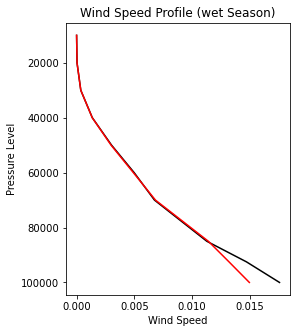

In [30]:
import matplotlib.pyplot as plt
import xarray as xr

# Assuming you have an xarray dataset called 'ds' with a 'pressure' dimension and a 'humidity' variable
fig  = plt.figure(figsize=(4, 5))

# Extract the pressure and humidity data
pressure_levels = hus_ctl_mon_amz_wet['plev'].values
ctl_values = hus_ctl_mon_amz_wet.values
def_values = hus_def_mon_amz_wet.values

# Create a vertical profile plot with pressure on the y-axis and humidity on the x-axis
plt.plot(ctl_values, pressure_levels,color='black')
plt.plot(def_values, pressure_levels,color='red')

# Set labels and title
plt.xlabel('Wind Speed')
plt.ylabel('Pressure Level')
plt.title('Wind Speed Profile (wet Season)')

# Invert the y-axis (pressure) so that higher values are at the top
plt.gca().invert_yaxis()
#plt.xscale('log')
# Show the plot
plt.show()

In [70]:
import cartopy.feature as cfeature
def plot_maps_multi(dataset, lat_min, lat_max, lon_min, lon_max, cmap, vmin=None, vmax=None):
    num_times = dataset.shape[0]
    
    proj = ccrs.PlateCarree(central_longitude=180) # Create Mollweide projections
    
    minlon = lon_min + 5 + 180 #on
    maxlon = lon_max - 5 + 180 #on
    
    fig, axs = plt.subplots(nrows=num_times, ncols=1, figsize=(6, 6*num_times), subplot_kw={'projection': proj}) # horizontal, vertical

    for i in range(num_times):
        dset_bd = xr.open_dataset('/work/mh0731/m300948/AMDEF/REGRID_BC/masking_files/AMAZON_Biome.nc')
        AMZ_BD = dset_bd.AMAZON_BIOMES
        
        ax = axs[i]
        ax.set_extent([minlon,maxlon,lat_min+5,lat_max-5],proj) #on
        ax.coastlines(resolution='50m', linewidth=1.5, color='black')
        ax.gridlines(draw_labels=True, linewidth=1.0, color='lightgrey',
                        xlocs=range(-180,180,10), ylocs=range(-90,90,10), 
                      transform=ccrs.PlateCarree())
        #im = ax.imshow(dataset[i], cmap=YlGnBu_new, vmin=vmin, vmax=vmax, proj)
        im = dataset[i].plot(ax=ax,
                      transform=ccrs.PlateCarree(),
                      cmap=cmap,
                      vmin=vmin,
                      vmax=vmax,
                      add_colorbar=False
                      )
        ax.set_title(f"Time: {i}")
        ax.set_xlabel("Longitude")
        ax.set_ylabel("Latitude")
        #ax.gridlines(linestyle='--', linewidth=0.5)
        #axs[i].set_xticks(np.arange(0, 361, 60))
        #axs[i].set_yticks(np.arange(-90, 91, 30))
        #ax.grid(True, linestyle='--', linewidth=0.5)
        #ax.add_feature(cfeature.COASTLINE)
        cbar = fig.colorbar(im, ax=axs[i], shrink=0.5)
        
        kw = {'levels':[-1], 'colors':['red'], 'linestyles':['solid']}
        plot_bd = AMZ_BD.plot.contour( 
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      **kw
                     )

    plt.tight_layout()
    plt.show()


In [127]:
def plot_data_amz_bd(data, colormap, extend, varmin, varmax, space, 
                     lat_min, lat_max, lon_min, lon_max, 
                     cb_title, title):
    
    ## Amazon basin contour
    dset_bd = xr.open_dataset('/work/mh0731/m300948/AMDEF/REGRID_BC/masking_files/AMAZON_Biome.nc')
    AMZ_BD = dset_bd.AMAZON_BIOMES
    
    proj = ccrs.PlateCarree(central_longitude=180) # Create Mollweide projections
    fig  = plt.figure(figsize=(8, 10))
    ax = fig.add_subplot(111, projection=proj)
    
    minlon = lon_min + 5 + 180 #on
    maxlon = lon_max - 5 + 180 #on
    
    ax.set_extent([minlon,maxlon,lat_min+5,lat_max-5],proj) #on
    ax.coastlines(resolution='50m', linewidth=1.5, color='black')
    
    ## gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=1.5, color='gray',
                        xlocs=range(-180,180,20), ylocs=range(-90,90,10), crs=ccrs.PlateCarree())
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style, gl.ylabel_style = {'fontsize': 25}, {'fontsize': 25}
    # manipulate `gridliner` object
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xlines = False
    gl.ylines = False

    ## plot data
    plot = data.plot(
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      cmap=colormap,
                      vmin=varmin,
                      vmax=varmax,
                     # cbar_kwargs={'label': 'Surface Temperature [K]',
                     #              'extend': 'both',
                     #              'shrink': .5,
                     #              'orientation': 'horizontal'},
                      add_colorbar=False
                     )
   
    kw = {'levels':[-1], 'colors':['red'], 'linestyles':['solid']}
    plot_bd = AMZ_BD.plot.contour( 
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      **kw
                     )
    
    bounds = np.linspace(varmin,varmax, space)
    cb = plt.colorbar(plot, orientation="horizontal", fraction=0.05, pad=0.10, extend=extend,ticks=bounds, boundaries=bounds)
    cb.ax.tick_params(labelsize=25)
    cb.ax.set_xticklabels(bounds,rotation=270)
    cb.set_label(label=cb_title, size=25)
    
    ax.set_title(title, y=1.1, fontsize=25)

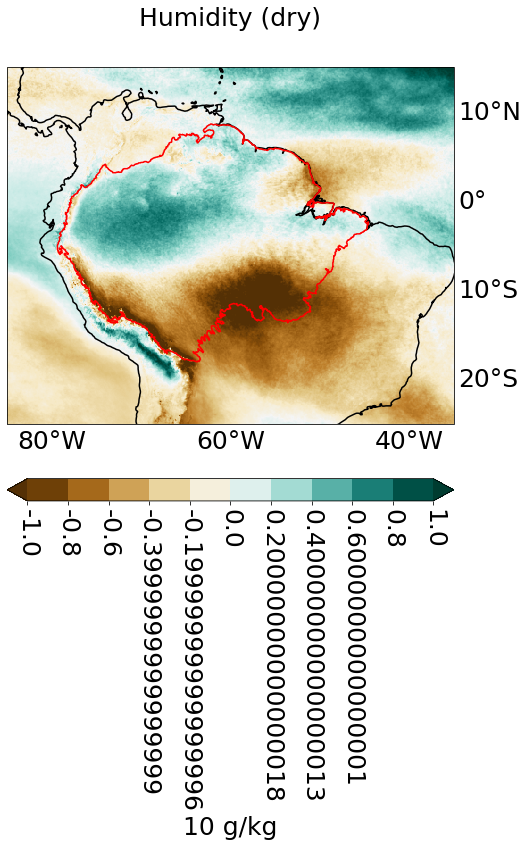

In [134]:
plot_data_amz_bd(hus_def_month_dry_jet*1000-hus_ctl_month_dry_jet*1000, 'BrBG', 'both',  -1.0, 1.0, 11, 
                      -30, 20, -90, -30,
                      '10 g/kg', 'Humidity (dry)')

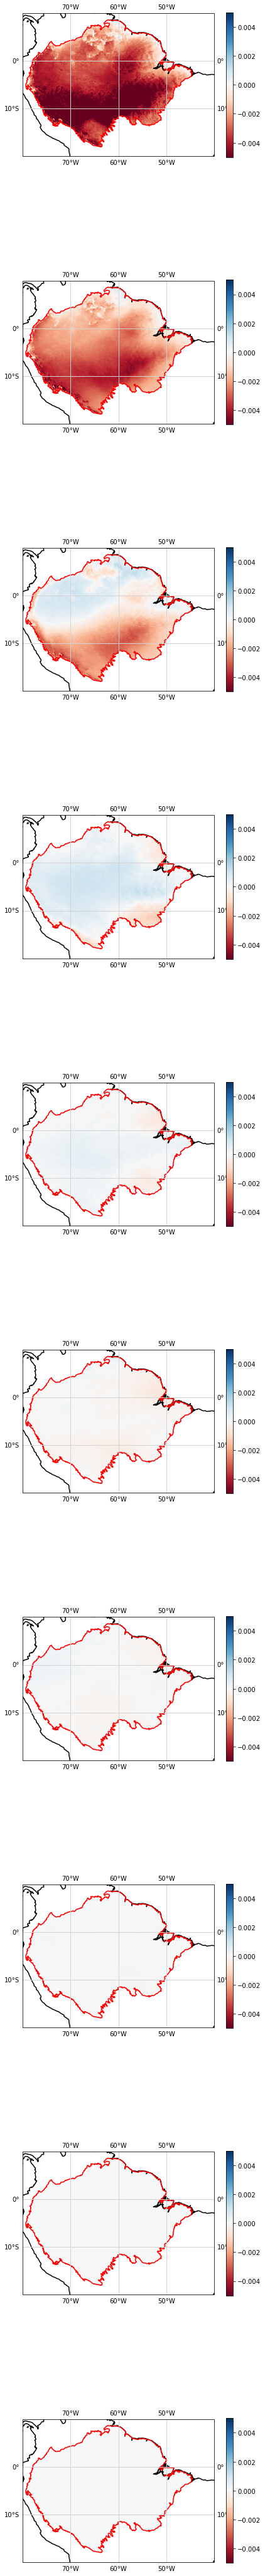

In [95]:
plot_maps(hus_def_amz_month_dry-hus_ctl_amz_month_dry, -25, 15, -85, -35, 'RdBu', vmin=-0.005, vmax=0.005)

_spatial mean_

In [81]:
# def
hus_def_amz_wet_mean = hus_def_amz_month_wet.mean(('lon','lat'))
hus_def_amz_dry_mean = hus_def_amz_month_dry.mean(('lon','lat'))
#ctl
hus_ctl_amz_wet_mean = hus_ctl_amz_month_wet.mean(('lon','lat'))
hus_ctl_amz_dry_mean = hus_ctl_amz_month_dry.mean(('lon','lat'))

In [82]:
hus_def_amz_wet_mean

<xarray.DataArray 'hus' (plev: 10)>
array([1.4956263e-02, 1.3193218e-02, 1.1405852e-02, 6.8270718e-03,
       4.9134940e-03, 2.9873282e-03, 1.3563427e-03, 3.6582045e-04,
       3.8930390e-05, 1.8870612e-06], dtype=float32)
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 3e+04 2e+04 1e+04

In [70]:
hus_def_amz_wet_mean

<xarray.DataArray 'hus' (plev: 10)>
array([1.4956263e+01, 1.3193218e+01, 1.1405851e+01, 6.8270717e+00,
       4.9134941e+00, 2.9873283e+00, 1.3563427e+00, 3.6582044e-01,
       3.8930390e-02, 1.8870612e-03], dtype=float32)
Coordinates:
  * plev     (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 3e+04 2e+04 1e+04

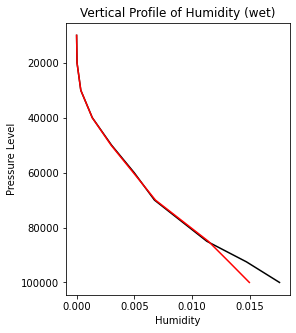

In [92]:
import matplotlib.pyplot as plt
import xarray as xr

# Assuming you have an xarray dataset called 'ds' with a 'pressure' dimension and a 'humidity' variable
fig  = plt.figure(figsize=(4, 5))

# Extract the pressure and humidity data
pressure_levels = hus_ctl_amz_wet_mean['plev'].values
ctl_humidity_values = hus_ctl_amz_wet_mean.values
def_humidity_values = hus_def_amz_wet_mean.values

# Create a vertical profile plot with pressure on the y-axis and humidity on the x-axis
plt.plot(ctl_humidity_values, pressure_levels,color='black')
plt.plot(def_humidity_values, pressure_levels,color='red')

# Set labels and title
plt.xlabel('Humidity')
plt.ylabel('Pressure Level')
plt.title('Vertical Profile of Humidity (wet)')

# Invert the y-axis (pressure) so that higher values are at the top
plt.gca().invert_yaxis()
#plt.xscale('log')
# Show the plot
plt.show()


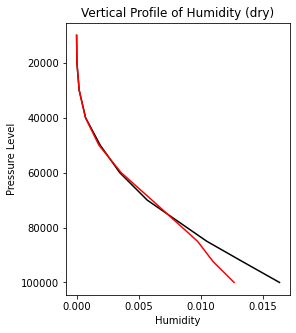

In [93]:
import matplotlib.pyplot as plt
import xarray as xr

# Assuming you have an xarray dataset called 'ds' with a 'pressure' dimension and a 'humidity' variable
fig  = plt.figure(figsize=(4, 5))

# Extract the pressure and humidity data
pressure_levels = hus_ctl_amz_dry_mean['plev'].values
ctl_humidity_values = hus_ctl_amz_dry_mean.values
def_humidity_values = hus_def_amz_dry_mean.values

# Create a vertical profile plot with pressure on the y-axis and humidity on the x-axis
plt.plot(ctl_humidity_values, pressure_levels,color='black')
plt.plot(def_humidity_values, pressure_levels,color='red')

# Set labels and title
plt.xlabel('Humidity')
plt.ylabel('Pressure Level')
plt.title('Vertical Profile of Humidity (dry)')

# Invert the y-axis (pressure) so that higher values are at the top
plt.gca().invert_yaxis()
#plt.xscale('log')
# Show the plot
plt.show()


## Load wider geopotential height

In [10]:
#Define a global pattern to find the files
###cloud liquid water 
glob_pattern_3d1 = 'ctl_daily_zg_plev_'
## Define the paths of file 1 (dppp0016)
data_path1 = Path('/scratch/m/m300948/test_04/3d/gph/')
## Collect all file names with pathlib's rglob and list compression  -- cloud liquid water 
file_icon_pp = sorted([str(f) for f in data_path1.rglob(f'{glob_pattern_3d1}*.nc')])[:]

In [11]:
#Define a global pattern to find the files
###GPH (1000, 850, 700, 500, 200)
glob_pattern_3d1 = 'def_daily_zg_plev_'
## Define the paths of file 1 (dppp0016)
data_path1 = Path('/scratch/m/m300948/def_100/3d/gph/')
## Collect all file names with pathlib's rglob and list compression  -- cloud liquid water 
file_def_pp = sorted([str(f) for f in data_path1.rglob(f'{glob_pattern_3d1}*.nc')])[:]

In [12]:
# 3d, select levels
times = ['2022-01-01','2022-12-31']
levels = ['70000','100000']
var = 'zg'
time_mean = '1MS'

zg_ctl_land = Tools.time_mean_model_3d(file_icon_pp,times,levels,time_mean,var,[-60,30],[-120,60],'trop')
zg_def_land = Tools.time_mean_model_3d(file_def_pp,times,levels,time_mean,var,[-60,30],[-120,60],'trop')

In [13]:
zg_ctl_mon = zg_ctl_land.groupby('time.month').mean('time')
zg_def_mon = zg_def_land.groupby('time.month').mean('time')

In [14]:
xarray_names = ['zg_ctl_mon','zg_def_mon']
for name in xarray_names:
    xarray_data = globals()[name]
    xarray_data_wet = xarray_data.where(xarray_data.month.isin([1,2,12]), drop=True).mean("month")
    xarray_data_dry = xarray_data.where(xarray_data.month.isin([7,8,9]), drop=True).mean("month")
#    xarray_data_trans = xarray_data.where(xarray_data.month.isin([3,4,5,10,11]), drop=True).mean("month")
    xarray_data_am = xarray_data.where(xarray_data.month.isin([5,6]), drop=True).mean("month")
#    xarray_data_on = xarray_data.where(xarray_data.month.isin([10,11]), drop=True).mean("month")
        
    new_name_wet = name + '_wet'
    new_name_dry = name + '_dry'
#    new_name_trans = name + '_trans'
    new_name_am = name + '_am'
#    new_name_on = name + '_on'
        
    globals()[new_name_wet] = xarray_data_wet
    globals()[new_name_dry] = xarray_data_dry
#    globals()[new_name_trans] = xarray_data_trans
    globals()[new_name_am] = xarray_data_am
#    globals()[new_name_on] = xarray_data_on

In [15]:
def plot_adv(title, dset_uas, dset_vas, q_interval, scale, data, colormap, extend, varmin, varmax, space, 
                    lat_min, lat_max, lon_min, lon_max,
                    obj_1 , lati_1, loni_1, colors_1, obj_2, lati_2, loni_2, colors_2):
    dset_bd = xr.open_dataset('/work/mh0731/m300948/AMDEF/REGRID_BC/masking_files/AMAZON_Biome.nc')
    AMZ_BD = dset_bd.AMAZON_BIOMES
    
    proj = ccrs.PlateCarree(central_longitude=180) # Create Mollweide projections
    fig  = plt.figure(figsize=(8, 10))
    ax = fig.add_subplot(111, projection=proj)
    
    minlon = lon_min + 5 + 180 #on
    maxlon = lon_max - 5 + 180 #on
    
    ax.set_extent([minlon,maxlon,lat_min+5,lat_max-5],proj) #on
    ax.coastlines(resolution='50m', linewidth=1.5, color='black')
    
    gl = ax.gridlines(draw_labels=True, linewidth=1.5, color='gray',
                        xlocs=range(-180,180,20), ylocs=range(-90,90,10), crs=ccrs.PlateCarree())
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style, gl.ylabel_style = {'fontsize': 25}, {'fontsize': 25}
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xlines = False
    gl.ylines = False
    
    bounds = np.linspace(varmin,varmax, space)
    plot = data.plot(
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      cmap=colormap,
                      vmin=varmin,
                      vmax=varmax,
                     # cbar_kwargs={'label': 'Surface Temperature [K]',
                     #              'extend': 'both',
                     #              'shrink': .5,
                     #              'orientation': 'horizontal'},
                      add_colorbar=False,
                      levels=bounds, # to fill up the white space
                      extend=extend
                     )
    #bounds = np.linspace(varmin,varmax, space)
    cb = plt.colorbar(plot, orientation="horizontal", fraction=0.05, pad=0.10, extend=extend,ticks=bounds, boundaries=bounds)
    cb.ax.tick_params(labelsize=20)
    cb.ax.set_xticklabels(bounds,rotation=270)
    
    vplot=ax.quiver(dset_uas.lon.values[::q_interval], dset_uas.lat.values[::q_interval], 
                    #dset_uas.drop('land_sea_mask').mean('time').isel(plev=vlevel).values[::q_interval], 
                    #dset_vas.drop('land_sea_mask').mean('time').isel(plev=vlevel).values[::q_interval],
                    dset_uas.values[::q_interval, ::q_interval], 
                    dset_vas.values[::q_interval, ::q_interval],
                    scale_units='xy',
                    scale=scale,
                    width=0.005,
                    angles='xy',
                    transform=ccrs.PlateCarree())
    #vref = ax.quiverkey(vplot, 0.9, 0.905, 20,
    #                            r'$20 \frac{m}{s}$',
    #                            labelpos='E',
    #                        coordinates='figure', zorder=5)
    
    # SAL
    if obj_1 == True:
        plt.scatter(x=loni_1, y=lati_1, transform=ccrs.PlateCarree(), color=colors_1, marker='o', s=500, edgecolors='black', linewidth=3,zorder=2) #colors_b[i]
        
    if obj_2 == True:
        plt.scatter(x=loni_2, y=lati_2, transform=ccrs.PlateCarree(), color=colors_2, marker='o', s=500, edgecolors='black', linewidth=3,zorder=2) #colors_b[i]
    
    ax.quiverkey(vplot, X=0.85, Y=0.80, U=5,
             label=r'$5 \frac{m}{s}$', labelpos='E',coordinates='figure')
    
    kw = {'levels':[-1], 'colors':['red'], 'linestyles':['solid']}
    plot_bd = AMZ_BD.plot.contour( 
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      **kw
                     )
    
    ax.set_title(title, y=1.1, fontsize=25)

In [16]:
zg_height_initial = [50, 750, 1490, 3110, 4380, 5820, 7500, 9590, 12200, 16350]
zg_height_final = [150, 800, 1530, 3150, 4400, 5850, 7560, 9650, 12350, 16450]
interval = [11, 51, 101, 151, 201, 251, 301, 351, 401, 451]

_Individual data_

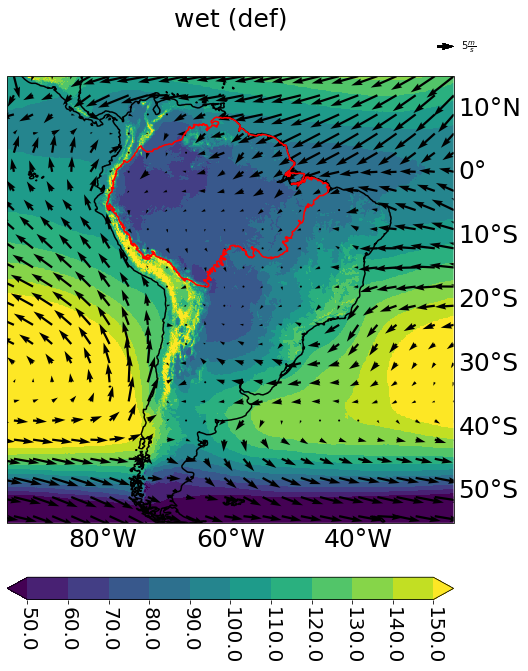

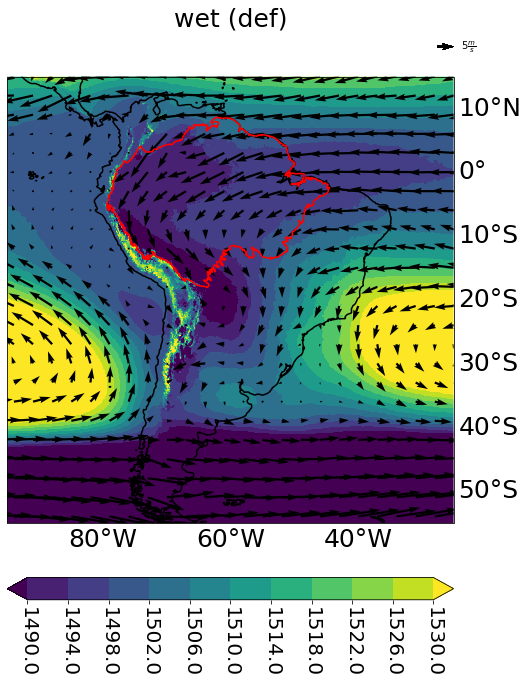

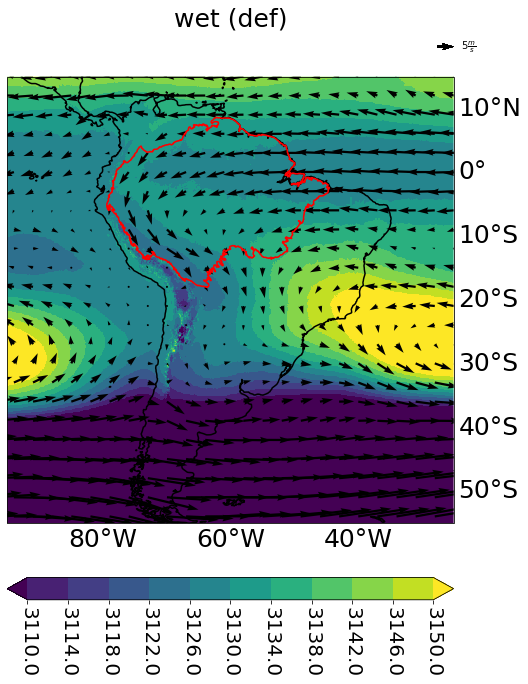

In [100]:
# -30, 20, 10, -90, -30, 10 // -60, 20, 10, -100, -15, 10
plevs= [100000, 85000, 70000]
zg_height_initial = [50, 1490, 3110, 4380]
zg_height_final = [150, 1530, 3150, 4400]

for i in range(3):
    plot_adv('wet (def)', uas_def_mon_wet.sel(plev=plevs[i]), vas_def_mon_wet.sel(plev=plevs[i]), 30, 2.0, zg_def_mon_wet.sel(plev=plevs[i]),  'viridis', 'both', zg_height_initial[i], zg_height_final[i], 11,
                    -60, 20, -100, -20)

_CTL_

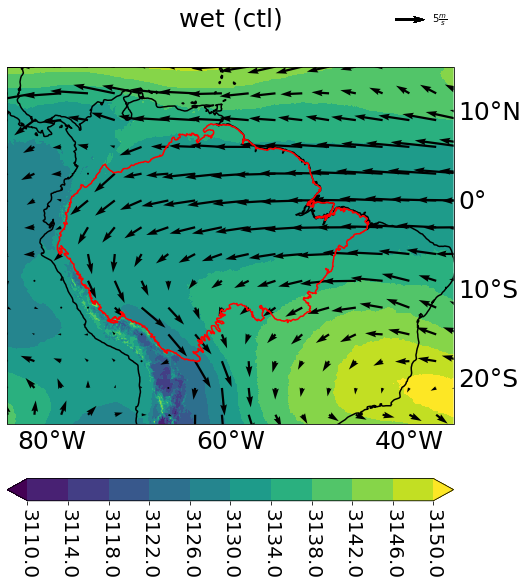

In [28]:
# -30, 20, 10, -90, -30, 10 // -60, 20, 10, -100, -15, 10
plevs= [70000]
zg_height_initial = [50, 1490, 3110, 4380]
zg_height_final = [150, 1530, 3150, 4400]
zg_height_diff_inital = []
zg_height_diff_final = []

for i in range(1):
    plot_adv('wet (ctl)', uas_ctl_mon_wet.sel(plev=plevs[i]), vas_ctl_mon_wet.sel(plev=plevs[i]), 30, 1.5,
             zg_ctl_mon_wet.sel(plev=plevs[i]),  'viridis', 'both', 3110, 3150, 11, 
                   -30, 20, -90, -30)

_difference_

In [150]:
# -30, 20, 10, -90, -30, 10 // -60, 20, 10, -100, -15, 10
plevs= [100000]
zg_height_initial = [50, 1490, 3110, 4380]
zg_height_final = [150, 1530, 3150, 4400]
zg_height_diff_inital = []
zg_height_diff_final = []

for i in range(1):
    plot_adv('am (diff)', uas_def_mon_am.sel(plev=plevs[i])-uas_ctl_mon_am.sel(plev=plevs[i]), vas_def_mon_am.sel(plev=plevs[i])-vas_ctl_mon_am.sel(plev=plevs[i]), 65, 0.35,
             zg_def_mon_am.sel(plev=plevs[i])-zg_ctl_mon_am.sel(plev=plevs[i]),  'PiYG_r', 'both', -50, 50, 11, 
                   -30, 20, -90, -30)

TypeError: plot_adv() missing 8 required positional arguments: 'obj_1', 'lati_1', 'loni_1', 'colors_1', 'obj_2', 'lati_2', 'loni_2', and 'colors_2'

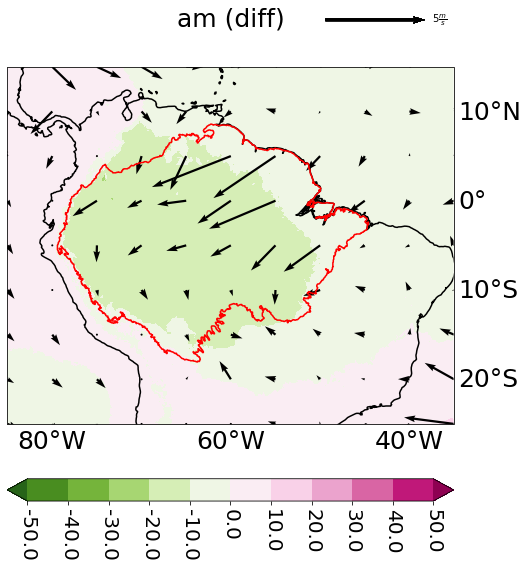

In [26]:
# -30, 20, 10, -90, -30, 10 // -60, 20, 10, -100, -15, 10
plevs= [100000]
zg_height_initial = [50, 1490, 3110, 4380]
zg_height_final = [150, 1530, 3150, 4400]
zg_height_diff_inital = []
zg_height_diff_final = []

for i in range(1):
    plot_adv('am (diff)', uas_def_mon_wet.sel(plev=plevs[i])-uas_ctl_mon_wet.sel(plev=plevs[i]), vas_def_mon_wet.sel(plev=plevs[i])-vas_ctl_mon_wet.sel(plev=plevs[i]), 50, 0.45,
             zg_def_mon_wet.sel(plev=plevs[i])-zg_ctl_mon_wet.sel(plev=plevs[i]),  'PiYG_r', 'both', -50, 50, 11, 
                   -30, 20, -90, -30,
                   False, sam_ctl_season_lati[1], sam_ctl_season_loni[1], right, False, sam_def_season_lati[1], sam_def_season_loni[1], left)

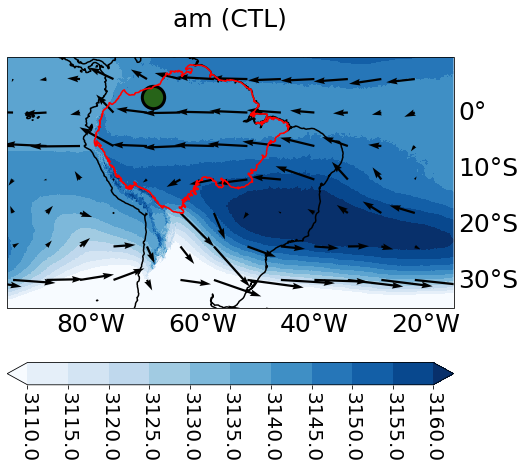

In [34]:
# -30, 20, 10, -90, -30, 10 // -60, 20, 10, -100, -15, 10
plevs= [70000]
zg_height_initial = [50, 1490, 3110, 4380]
zg_height_final = [150, 1530, 3150, 4400]
zg_height_diff_inital = []
zg_height_diff_final = []

for i in range(1):
    plot_adv('am (CTL)', uas_ctl_mon_am.sel(plev=plevs[i]), vas_ctl_mon_am.sel(plev=plevs[i]), 60, 1.0,
             zg_ctl_mon_am.sel(plev=plevs[i]),  'Blues', 'both', 3110, 3160, 11, 
                   -40, 15, -100, -10,
                   True, sam_ctl_season_lati[0], sam_ctl_season_loni[0], right, False, sam_def_season_lati[2], sam_def_season_loni[2], left)

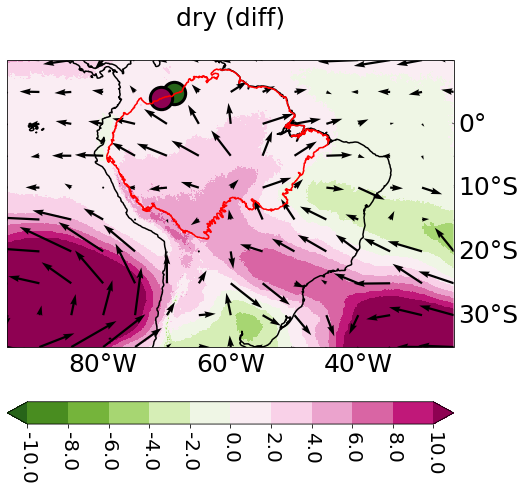

In [23]:
# -30, 20, 10, -90, -30, 10 // -60, 20, 10, -100, -15, 10
plevs= [70000]
zg_height_initial = [50, 1490, 3110, 4380]
zg_height_final = [150, 1530, 3150, 4400]
zg_height_diff_inital = []
zg_height_diff_final = []

for i in range(1):
    plot_adv('dry (diff)', uas_def_mon_dry.sel(plev=plevs[i])-uas_ctl_mon_dry.sel(plev=plevs[i]), vas_def_mon_dry.sel(plev=plevs[i])-vas_ctl_mon_dry.sel(plev=plevs[i]), 50, 0.45,
             zg_def_mon_dry.sel(plev=plevs[i])-zg_ctl_mon_dry.sel(plev=plevs[i]),  'PiYG_r', 'both', -10, 10, 11, 
                   -40, 15, -100, -20,
                   True, sam_ctl_season_lati[2], sam_ctl_season_loni[2], right, True, sam_def_season_lati[2], sam_def_season_loni[2], left)

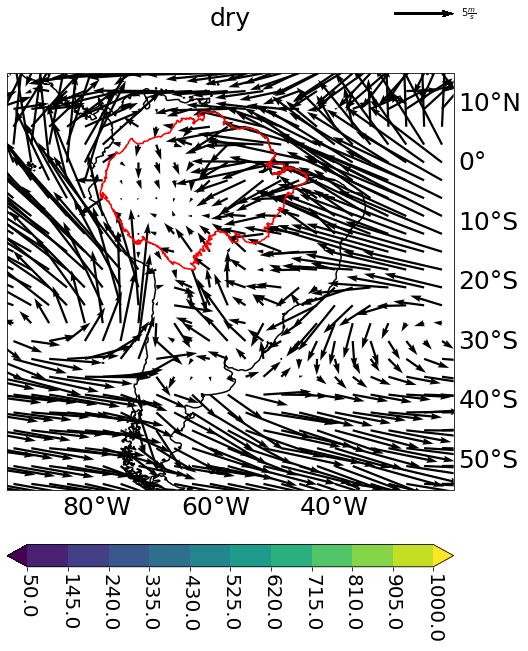

In [99]:
initial = 0
#zg_height_initial[initial+i], zg_height_final[initial+i],
for i in range(1):
    plot_adv('dry', uas_def_mon_dry.isel(plev=initial+i), vas_def_mon_dry.isel(plev=initial+i), 30, 0.5, zg_def_mon_dry.isel(plev=initial+i),  'viridis', 'both', 50, 1000, 11, 
                   -60, 20, -100, -15)
    
    #title, dset_uas, dset_vas, q_interval, scale, data, colormap, extend, varmin, varmax, space, 
    #                lat_min, lat_max, lon_min, lon_max

In [43]:
zg_height_initial = [50, 750, 1490, 3110, 4380, 5820, 7500, 9590, 12200, 16350]
zg_height_final = [150, 800, 1530, 3150, 4400, 5850, 7560, 9650, 12350, 16450]
#interval = [11, 51, 101, 151, 201, 251, 301, 351, 401, 451]

In [27]:
def contf_tmean(title, data, label, colormap, extend, varmin, varmax, space, lat_min, lat_max, lon_min, lon_max):
    dset_bd = xr.open_dataset('/work/mh0731/m300948/AMDEF/REGRID_BC/masking_files/AMAZON_Biome.nc')
    AMZ_BD = dset_bd.AMAZON_BIOMES
    
    proj = ccrs.PlateCarree(central_longitude=0) # Create Mollweide projections
    fig = plt.figure(figsize=(18, 12))
    ax = fig.add_subplot(111, projection=proj)
    minlon = lon_min + 5 #+ 180 #on
    maxlon = lon_max - 5 #+ 180 #on
    
    ax.set_extent([minlon,maxlon,lat_min+5,lat_max-5],proj) #on
    ax.coastlines(resolution='50m', linewidth=1.5, color='black')
    #ax.coastlines(resolution='10m', lw=0.51)
    gl = ax.gridlines(draw_labels=True, linewidth=1.5, color='gray',
                        xlocs=range(-180,180,20), ylocs=range(-90,90,10), crs=ccrs.PlateCarree())
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style, gl.ylabel_style = {'fontsize': 25}, {'fontsize': 25}
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xlines = False
    gl.ylines = False
    
    #plot = data.where((data.lat >= lat_min) & (data.lat <= lat_max) & (data.lon >= lon_min) & (data.lon <= lon_max)).plot(
    bounds = np.linspace(varmin,varmax, space)
    plot = data.plot(
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      #transform=proj,
                      cmap=colormap,
                      vmin=varmin,
                      vmax=varmax,
                     # cbar_kwargs={'label': 'Surface Temperature [K]',
                     #              'extend': 'both',
                     #              'shrink': .5,
                     #              'orientation': 'horizontal'},
                      add_colorbar=False, 
                      levels = bounds,
                      extend=extend
                     )
    bounds = np.linspace(varmin,varmax, space)
    cb = plt.colorbar(plot, orientation="horizontal", fraction=0.05, pad=0.10, extend=extend,ticks=bounds, boundaries=bounds)
    cb.set_label(label=label, size=20, weight='bold')
    cb.ax.tick_params(labelsize=35)
    cb.ax.set_xticklabels(bounds,rotation=270)
    #ax.coastlines(resolution='10m', lw=0.51)
    #gl=ax.gridlines(draw_labels=True, crs=proj)
    #gl.xformatter = LONGITUDE_FORMATTER
    #gl.yformatter = LATITUDE_FORMATTER
    #gl.xlabel_style, gl.ylabel_style = {'fontsize': 15}, {'fontsize': 15}
    
    #ax.yaxis.tick_right() 
    
    kw = {'levels':[-1], 'colors':['red'], 'linestyles':['solid']}
    plot_bd = AMZ_BD.plot.contour( 
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      **kw
                     )
    
    ax.set_title(title, y=1.1, fontsize=25)
    _ = fig.subplots_adjust(left=0.01, right=0.98, hspace=0, wspace=0, top=0.9, bottom=0.25)

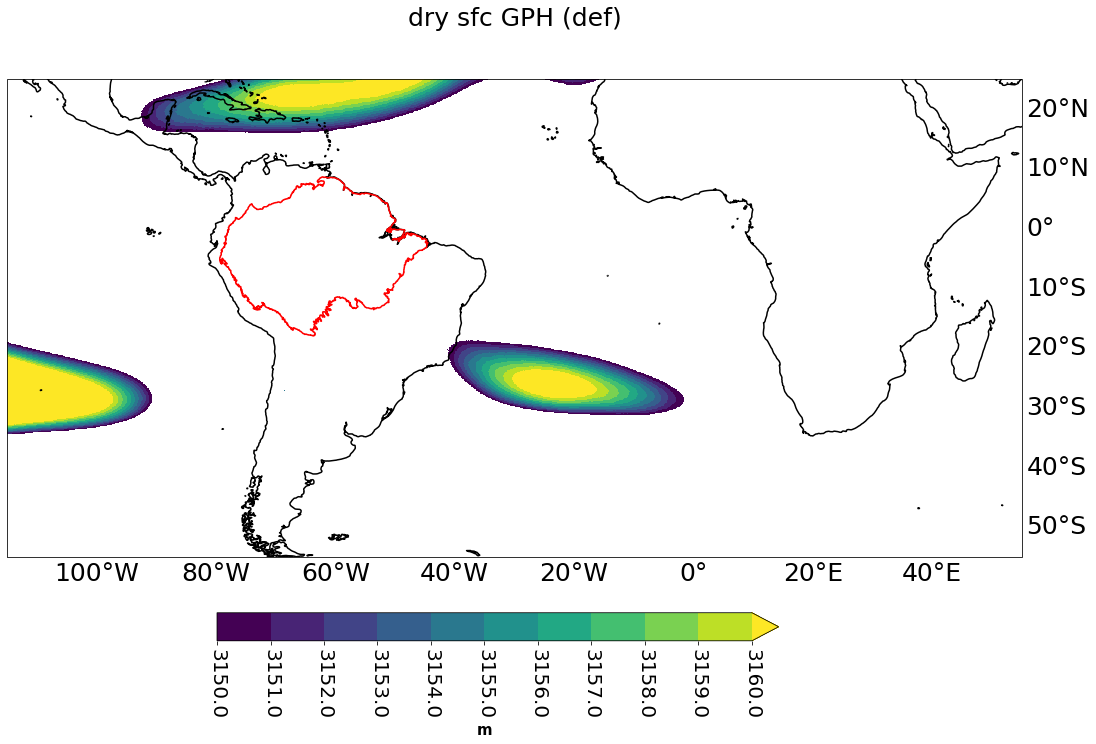

In [21]:
contf_tmean('dry sfc GPH (def)', zg_def_mon_wet.sel(plev=70000), 'm', 'viridis', 'max', 3150, 3160, 11, -60, 30, -120, 60) #lat_min, lat_max, lon_min, lon_max

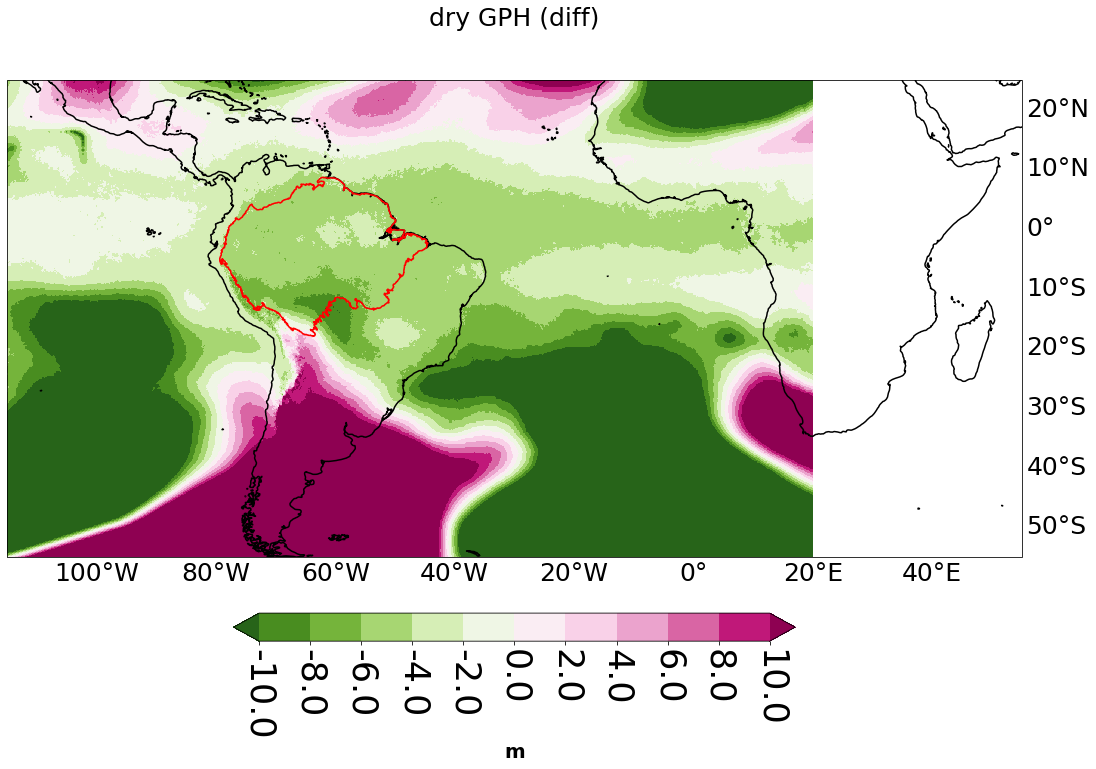

In [28]:
# difference of GPH
contf_tmean('dry GPH (diff)', zg_def_mon.sel(month=12,plev=70000)-zg_ctl_mon.sel(month=12,plev=70000), 'm', 'PiYG_r', 'both', -10, 10, 11, -60, 30, -120, 60) #lat_min, lat_max, lon_min, lon_max

In [17]:
def cont_var(title, data1, data2, color1, color2, varmin, varmax, step_level, lat_min, lat_max, lon_min, lon_max):
    # boundary of Amazon basin
    dset_bd = xr.open_dataset('/work/mh0731/m300948/AMDEF/REGRID_BC/masking_files/AMAZON_Biome.nc')
    AMZ_BD = dset_bd.AMAZON_BIOMES
    
    # projection
    proj = ccrs.PlateCarree(central_longitude=0) # Create Mollweide projections
    fig = plt.figure(figsize=(18, 12))
    ax = fig.add_subplot(111, projection=proj)
    minlon = lon_min + 5 #+ 180 #on
    maxlon = lon_max - 5 #+ 180 #on
    
    ax.set_extent([minlon,maxlon,lat_min+5,lat_max-5],proj) #on
    ax.coastlines(resolution='50m', linewidth=1.5, color='black')
    #ax.coastlines(resolution='10m', lw=0.51)
    gl = ax.gridlines(draw_labels=True, linewidth=1.5, color='gray',
                        xlocs=range(-180,180,20), ylocs=range(-90,90,10), crs=ccrs.PlateCarree())
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style, gl.ylabel_style = {'fontsize': 25}, {'fontsize': 25}
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xlines = False
    gl.ylines = False
    
    #levels = np.arange(varmin, varmax + step_level, step_level)
    plot1 = data1.plot.contour(
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      #transform=proj,
                      colors=color1,
                      vmin=varmin,
                      vmax=varmax,
                      levels=step_level,
                      linewidths=2.5,
                     # cbar_kwargs={'label': 'Surface Temperature [K]',
                     #              'extend': 'both',
                     #              'shrink': .5,
                     #              'orientation': 'horizontal'},
                      add_colorbar=False
                     )
    
    plot2 = data2.plot.contour(
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      #transform=proj,
                      colors=color2,
                      vmin=varmin,
                      vmax=varmax,
                      levels=step_level,
                      linewidths=2.5,
                     # cbar_kwargs={'label': 'Surface Temperature [K]',
                     #              'extend': 'both',
                     #              'shrink': .5,
                     #              'orientation': 'horizontal'},
                      add_colorbar=False
                     )
    #ax.clabel(plot1, inline=True, fontsize=20)
    #ax.clabel(plot2, inline=True, fontsize=20)

    kw = {'levels':[-1], 'colors':['red'], 'linestyles':['solid']}
    plot_bd = AMZ_BD.plot.contour( 
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      **kw
                     )
    
    ax.set_title(title, y=1.1, fontsize=25)
    _ = fig.subplots_adjust(left=0.01, right=0.98, hspace=0, wspace=0, top=0.9, bottom=0.25)

In [ ]:
zg8570_ctl_mon_dry = (zg_ctl_mon_dry.isel(plev=1)+zg_ctl_mon_dry.isel(plev=2))/2
zg8570_def_mon_dry = (zg_def_mon_dry.isel(plev=1)+zg_def_mon_dry.isel(plev=2))/2

In [45]:
zg8570_ctl_mon_wet = (zg_ctl_mon_wet.isel(plev=1)+zg_ctl_mon_wet.isel(plev=2))/2
zg8570_def_mon_wet = (zg_def_mon_wet.isel(plev=1)+zg_def_mon_wet.isel(plev=2))/2

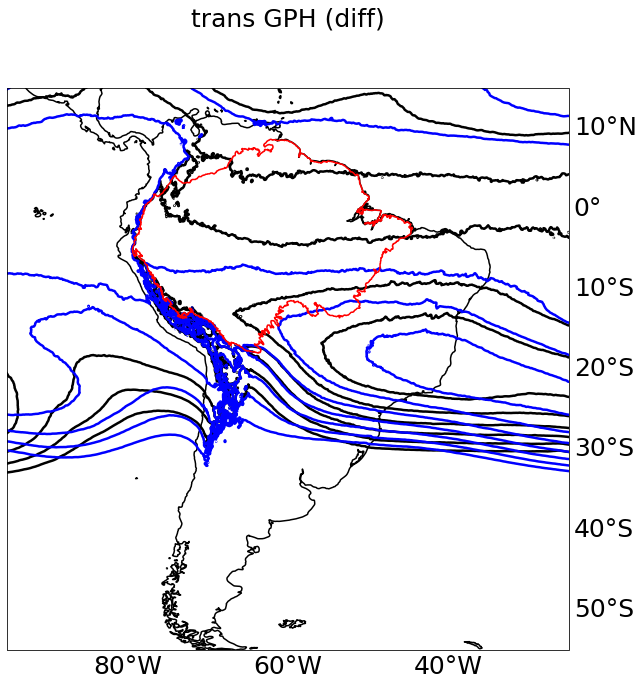

In [118]:
#cont_var(title, data1, data2, color1, color2, varmin, varmax, step_level, lat_min, lat_max, lon_min, lon_max) #50, 150 // 1490, 1530 // 3110, 3150 -> zg8570(2300,2340)
cont_var('trans GPH (diff)', zg_ctl_mon_trans.sel(plev=70000), zg_def_mon_trans.sel(plev=70000), 'black', 'blue', 3120, 3170, 8, -60, 20, -100, -20) #lat_min, lat_max, lon_min, lon_max (-60, 20, 10, -100, -15, 10)

ValueError: cannot convert float NaN to integer

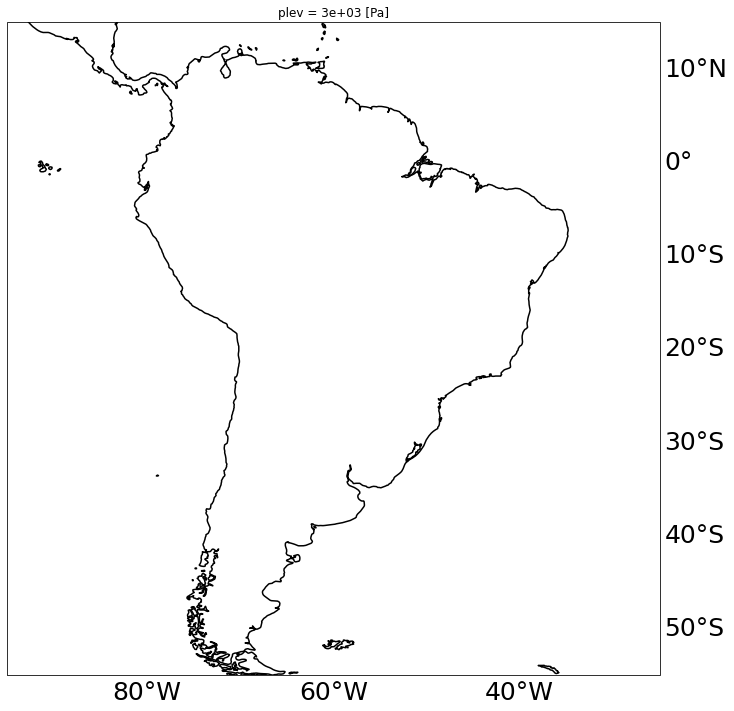

In [51]:
#cont_var(title, data1, data2, color1, color2, varmin, varmax, step_level, lat_min, lat_max, lon_min, lon_max) #50, 150 // 1490, 1530 // 3110, 3150
cont_var('wet GPH (diff)', zg_ctl_mon_wet.isel(plev=2), zg_def_mon_wet.isel(plev=2), 'black', 'blue', 3120, 3170, 8, -60, 20, -100, -20) #lat_min, lat_max, lon_min, lon_max (-60, 20, 10, -100, -15, 10)

In [54]:
zg_ctl_mon_dry.isel(plev=1)

<xarray.DataArray 'zg' (lat: 900, lon: 1400)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    plev     float64 1e+03
  * lon      (lon) float64 -120.0 -119.9 -119.8 -119.7 ... 19.75 19.85 19.95
  * lat      (lat) float64 -59.95 -59.85 -59.75 -59.65 ... 29.75 29.85 29.95

ValueError: cannot convert float NaN to integer

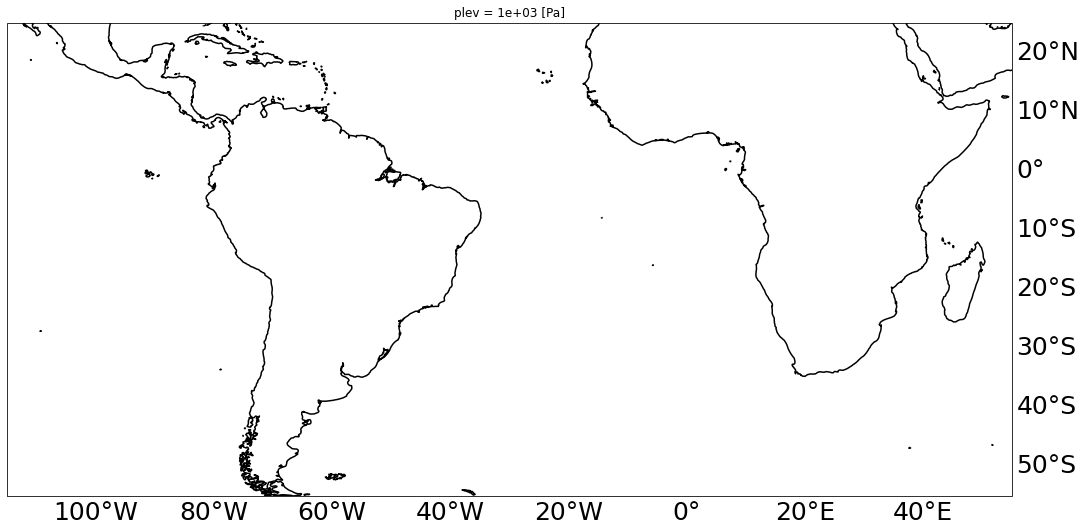

In [52]:
cont_var('wet GPH (diff)', zg_ctl_mon_wet.isel(plev=1), zg_def_mon_wet.isel(plev=1), 'black', 'blue', 1490, 1530, 4, -60, 30, -120, 60) #lat_min, lat_max, lon_min, lon_max

In [18]:
# cont_var(title, data1, data2, color1, color2, varmin, varmax, step_level, lat_min, lat_max, lon_min, lon_max) 
def plot_adv_gph(title, dset_uas, dset_vas, q_interval, scale, data1, plot2, data2, color1, color2, varmin, varmax, step_level, 
                    lat_min, lat_max, lon_min, lon_max):
    dset_bd = xr.open_dataset('/work/mh0731/m300948/AMDEF/REGRID_BC/masking_files/AMAZON_Biome.nc')
    AMZ_BD = dset_bd.AMAZON_BIOMES
    
    proj = ccrs.PlateCarree(central_longitude=180) # Create Mollweide projections
    fig  = plt.figure(figsize=(8, 10))
    ax = fig.add_subplot(111, projection=proj)
    
    minlon = lon_min + 5 + 180 #on
    maxlon = lon_max - 5 + 180 #on
    
    ax.set_extent([minlon,maxlon,lat_min+5,lat_max-5],proj) #on
    ax.coastlines(resolution='50m', linewidth=1.5, color='black')
    
    gl = ax.gridlines(draw_labels=True, linewidth=1.5, color='gray',
                        xlocs=range(-180,180,20), ylocs=range(-90,90,10), crs=ccrs.PlateCarree())
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style, gl.ylabel_style = {'fontsize': 25}, {'fontsize': 25}
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xlines = False
    gl.ylines = False
    
    # wind quiver
    vplot=ax.quiver(dset_uas.lon.values[::q_interval], dset_uas.lat.values[::q_interval], 
                    #dset_uas.drop('land_sea_mask').mean('time').isel(plev=vlevel).values[::q_interval], 
                    #dset_vas.drop('land_sea_mask').mean('time').isel(plev=vlevel).values[::q_interval],
                    dset_uas.values[::q_interval, ::q_interval], 
                    dset_vas.values[::q_interval, ::q_interval],
                    scale_units='xy',
                    scale=scale,
                    width=0.005,
                    angles='xy',
                    transform=ccrs.PlateCarree())
    #levels = np.arange(varmin, varmax + step_level, step_level)
    plot1 = data1.plot.contour(
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      #transform=proj,
                      colors=color1,
                      vmin=varmin,
                      vmax=varmax,
                      levels=step_level,
                      linewidths=2.5,
                     # cbar_kwargs={'label': 'Surface Temperature [K]',
                     #              'extend': 'both',
                     #              'shrink': .5,
                     #              'orientation': 'horizontal'},
                      add_colorbar=False
                     )
    if plot2 == True: 
        plot2 = data2.plot.contour(
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      #transform=proj,
                      colors=color2,
                      vmin=varmin,
                      vmax=varmax,
                      levels=step_level,
                      linewidths=2.5,
                     # cbar_kwargs={'label': 'Surface Temperature [K]',
                     #              'extend': 'both',
                     #              'shrink': .5,
                     #              'orientation': 'horizontal'},
                      add_colorbar=False
                     )
        ax.clabel(plot2, inline=True, fontsize=20)
    ax.clabel(plot1, inline=True, fontsize=20)
    #ax.clabel(plot2, inline=True, fontsize=20)
    
    #vref = ax.quiverkey(vplot, 0.9, 0.905, 20,
    #                            r'$20 \frac{m}{s}$',
    #                            labelpos='E',
    #                        coordinates='figure', zorder=5)
    ax.quiverkey(vplot, X=0.9, Y=0.90, U=5,
             label=r'$5 \frac{m}{s}$', labelpos='E',coordinates='figure')
    
    kw = {'levels':[-1], 'colors':['red'], 'linestyles':['solid']}
    plot_bd = AMZ_BD.plot.contour( 
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      **kw
                     )
    
    ax.set_title(title, y=1.1, fontsize=25)

In [19]:
# cont_var(title, data1, data2, color1, color2, varmin, varmax, step_level, lat_min, lat_max, lon_min, lon_max) 
def plot_adv_gph(title, dset_uas, dset_vas, q_interval, scale, data1, plot2, data2, color1, color2, varmin, varmax, step_level, 
                    lat_min, lat_max, lon_min, lon_max,
                    obj_1 , lati_1, loni_1, colors_1, obj_2, lati_2, loni_2, colors_2):
    dset_bd = xr.open_dataset('/work/mh0731/m300948/AMDEF/REGRID_BC/masking_files/AMAZON_Biome.nc')
    AMZ_BD = dset_bd.AMAZON_BIOMES
    
    proj = ccrs.PlateCarree(central_longitude=180) # Create Mollweide projections
    fig  = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(111, projection=proj)
    
    minlon = lon_min + 5 + 180 #on
    maxlon = lon_max - 5 + 180 #on
    
    ax.set_extent([minlon,maxlon,lat_min+5,lat_max-5],proj) #on
    ax.coastlines(resolution='50m', linewidth=1.5, color='black')
    
    gl = ax.gridlines(draw_labels=True, linewidth=1.5, color='gray',
                        xlocs=range(-180,180,20), ylocs=range(-90,90,10), crs=ccrs.PlateCarree())
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style, gl.ylabel_style = {'fontsize': 25}, {'fontsize': 25}
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xlines = False
    gl.ylines = False
    
    # wind quiver
    vplot=ax.quiver(dset_uas.lon.values[::q_interval], dset_uas.lat.values[::q_interval], 
                    #dset_uas.drop('land_sea_mask').mean('time').isel(plev=vlevel).values[::q_interval], 
                    #dset_vas.drop('land_sea_mask').mean('time').isel(plev=vlevel).values[::q_interval],
                    dset_uas.values[::q_interval, ::q_interval], 
                    dset_vas.values[::q_interval, ::q_interval],
                    scale_units='xy',
                    scale=scale,
                    width=0.005,
                    angles='xy',
                    transform=ccrs.PlateCarree())
    #levels = np.arange(varmin, varmax + step_level, step_level)
    plot1 = data1.plot.contour(
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      #transform=proj,
                      cmap=color1,
                      vmin=varmin,
                      vmax=varmax,
                      #levels=step_level,
                      levels = np.arange(varmin, varmax + step_level, step_level),
                      linewidths=4.5,
                     # cbar_kwargs={'label': 'Surface Temperature [K]',
                     #              'extend': 'both',
                     #              'shrink': .5,
                     #              'orientation': 'horizontal'},
                      add_colorbar=False
                     )
    if plot2 == True: 
        plot2 = data2.plot.contour(
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      #transform=proj,
                      cmap=color2,
                      vmin=varmin,
                      vmax=varmax,
                      levels = np.arange(varmin, varmax + step_level, step_level),
                      linewidths=4.5,
                     # cbar_kwargs={'label': 'Surface Temperature [K]',
                     #              'extend': 'both',
                     #              'shrink': .5,
                     #              'orientation': 'horizontal'},
                      add_colorbar=False
                     )
        ax.clabel(plot2, inline=True, fontsize=35)
    ax.clabel(plot1, inline=True, levels=np.arange(varmin, varmax + step_level, step_level), fontsize=35)
    #ax.clabel(plot2, inline=True, fontsize=20)
    
    #vref = ax.quiverkey(vplot, 0.9, 0.905, 20,
    #                            r'$20 \frac{m}{s}$',
    #                            labelpos='E',
    #                        coordinates='figure', zorder=5)
    ax.quiverkey(vplot, X=0.78, Y=0.93, U=5,
             label=r'$5 \frac{m}{s}$', labelpos='E',coordinates='figure')
    
    kw = {'levels':[-1], 'colors':['red'], 'linestyles':['solid']}
    plot_bd = AMZ_BD.plot.contour( 
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      **kw
                     )
    
    if obj_1 == True:
        plt.scatter(x=loni_1, y=lati_1, transform=ccrs.PlateCarree(), color=colors_1, marker='o', s=500, edgecolors='black', linewidth=3,zorder=2) #colors_b[i]
        
    if obj_2 == True:
        plt.scatter(x=loni_2, y=lati_2, transform=ccrs.PlateCarree(), color=colors_2, marker='o', s=500, edgecolors='black', linewidth=3,zorder=2) #colors_b[i]
    
    ax.set_title(title, y=1.1, fontsize=25)

### Masking mountains

In [30]:
def mask_cal(dset):
    ##This function calculate the land_sea mask according to the resolution of the data##
    ###negative values is ocean, positive values is land
    filemask = '/work/mh0731/from_Mistral/mh0731/m300876/land_sea_mask/GPM_IMERG_LandSeaMask.2.nc4'
    dsetmask = xr.open_dataset(filemask)
    lsmask01 = dsetmask.landseamask.where(
        dsetmask.landseamask<100).interp(lon=dset.lon.values,lat=dset.lat.values,method='linear') *0 +2
    lsmask01 = lsmask01.where(lsmask01==2,-2)
    return lsmask01

In [29]:
def time_mean_topo(file,lat,lon,environ):
    ##Funtion to calculate the climatology monthly mean of precipitation from IMERG
    ###the environ option mask the values over land or ocean:
        ## if environ = 'trop' -> no mask is used
        ## if environ = 'ocean' -> return only values over ocean
        ## if environ = 'land' -> return only values over land
    data = xr.open_mfdataset(
        file, engine='netcdf4')['elevation']
    if environ == 'trop':
        pr=data.sel(lat=slice(lat[0],lat[1]),lon=slice(lon[0],lon[1]))
    else:
        lsmask01 = mask_cal(data)
        if environ == 'ocean':
            pr=data.where(lsmask01<0).sel(lat=slice(lat[0],lat[1]),lon=slice(lon[0],lon[1]))
        elif environ == 'land':
            pr=data.where(lsmask01>0).sel(lat=slice(lat[0],lat[1]),lon=slice(lon[0],lon[1]))
        else:
            return print('Something is wrong')
    
    jobs = dask.persist(pr) # prmon_clim (month, lat, lon) for the mean/ prmon (year, month, lat, lon) for the std
    progress(jobs, notebook=False)
    topo = dask.compute(pr) # prmon_clim
    
    return topo[0]

In [31]:
topo_file = '/work/mh0731/m300948/AMDEF/REGRID_BC/amz_ori/bc_land_sso_remap.nc'
#amz_topo = time_mean_topo(topo_file,[-60,20],[-100,-20],'land') # for wind
amz_topo = time_mean_topo(topo_file,[-60,30],[-120,60],'trop') # for GPH

In [32]:
# wind
amz_topo_interp = amz_topo.interp(lat=uas_def_mon_dry.lat, lon=uas_def_mon_dry.lon)
print(amz_topo_interp.shape)

(800, 800)


In [33]:
# GPH
amz_topo_interp = amz_topo.interp(lat=zg_ctl_mon_dry.lat, lon=zg_ctl_mon_dry.lon)
print(amz_topo_interp.shape)

(900, 1400)


_Masking wind_

In [221]:
#amz_topo_mask = xr.where(amz_topo>=2000, amz_topo, np.nan)
# CTL
uas_ctl_dry_700_mask = xr.where(amz_topo_interp<=2000, uas_ctl_mon_dry.sel(plev=70000), np.nan)
vas_ctl_dry_700_mask = xr.where(amz_topo_interp<=2000, vas_ctl_mon_dry.sel(plev=70000), np.nan)

uas_ctl_wet_700_mask = xr.where(amz_topo_interp<=2000, uas_ctl_mon_wet.sel(plev=70000), np.nan)
vas_ctl_wet_700_mask = xr.where(amz_topo_interp<=2000, vas_ctl_mon_wet.sel(plev=70000), np.nan)

print(uas_ctl_dry_700_mask.shape)

(800, 800)


In [222]:
#amz_topo_mask = xr.where(amz_topo>=2000, amz_topo, np.nan)
# DEF
uas_def_dry_700_mask = xr.where(amz_topo_interp<=2000, uas_def_mon_dry.sel(plev=70000), np.nan)
vas_def_dry_700_mask = xr.where(amz_topo_interp<=2000, vas_def_mon_dry.sel(plev=70000), np.nan)

uas_def_wet_700_mask = xr.where(amz_topo_interp<=2000, uas_def_mon_wet.sel(plev=70000), np.nan)
vas_def_wet_700_mask = xr.where(amz_topo_interp<=2000, vas_def_mon_wet.sel(plev=70000), np.nan)

print(uas_def_dry_700_mask.shape)

(800, 800)


_Masking GPH_

In [234]:
#amz_topo_mask = xr.where(amz_topo>=2000, amz_topo, np.nan)
# CTL
zg_ctl_dry_700_mask = xr.where(amz_topo_interp<=2000, zg_ctl_mon_dry.isel(plev=2), np.nan)
zg_def_dry_700_mask = xr.where(amz_topo_interp<=2000, zg_def_mon_dry.isel(plev=2), np.nan)

zg_ctl_wet_700_mask = xr.where(amz_topo_interp<=2000, zg_ctl_mon_wet.isel(plev=2), np.nan)
zg_def_wet_700_mask = xr.where(amz_topo_interp<=2000, zg_def_mon_wet.isel(plev=2), np.nan)

print(zg_ctl_dry_700_mask.shape)

(900, 1400)


_Interpolating nan values_

In [283]:
zg_ctl_dry_700_mask_filled = zg_ctl_dry_700_mask.fillna(zg_ctl_dry_700_mask.mean('lon'))
zg_def_dry_700_mask_filled = zg_def_dry_700_mask.fillna(zg_def_dry_700_mask.mean('lon'))

_plotting_

In [18]:
# mj_pr_ctl, wet_pr_ctl, dry_pr_ctl
sam_ctl_season_lati = [2.75,-17.75, 4.85]
sam_def_season_lati = [1.95, -12.55, 4.15]
sam_ctl_season_loni = [-68.85, -66.75, -68.85]
sam_def_season_loni = [-70.25, -63.25, -70.85]

In [20]:
cmap = matplotlib.cm.get_cmap('PiYG')
left = cmap(0.0)
right = cmap(1.0)

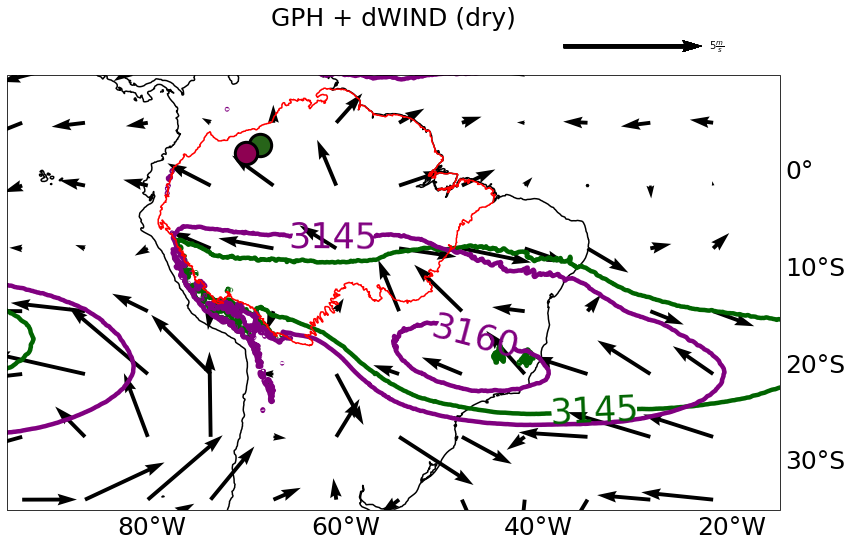

In [101]:
# DRY Difference
plot_adv_gph('GPH + dWIND (dry)', uas_def_mon_dry.sel(plev=70000)-uas_ctl_mon_dry.sel(plev=70000), vas_def_mon_dry.sel(plev=70000)-vas_ctl_mon_dry.sel(plev=70000), 65, 0.35, 
             zg_ctl_mon_dry.sel(plev=70000), True, zg_def_mon_dry.sel(plev=70000), 'darkgreen', 'purple', 3145, 3158, 15, -40, 15, -100, -10,
             True , sam_ctl_season_lati[0], sam_ctl_season_loni[0], right, True, sam_def_season_lati[0], sam_def_season_loni[0], left) # -60, 20, -100, -20 //-30, 20, -90, -30

# obj_1 , lati_1, loni_1, colors_1, obj_2, lati_2, loni_2, colors_2

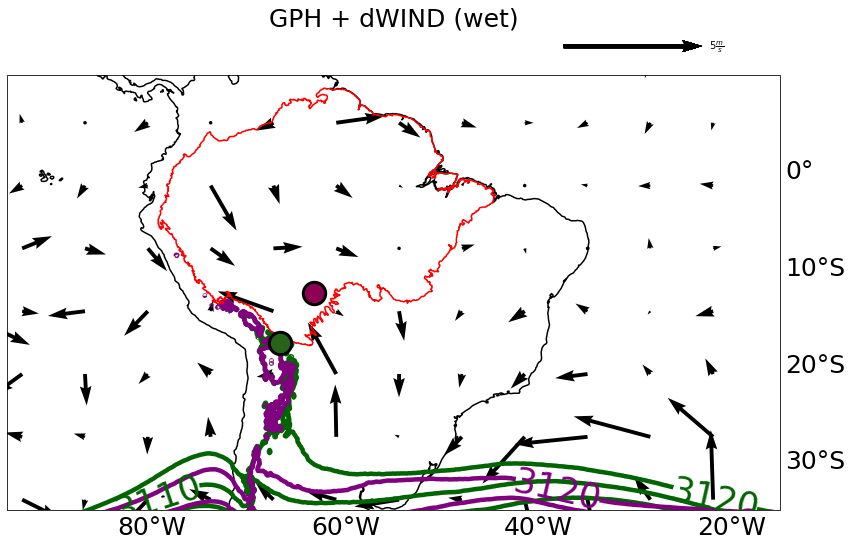

In [105]:
# WET diff
plot_adv_gph('GPH + dWIND (wet)', uas_def_mon_wet.sel(plev=70000)-uas_ctl_mon_wet.sel(plev=70000), vas_def_mon_wet.sel(plev=70000)-vas_ctl_mon_wet.sel(plev=70000), 65, 0.35, 
             zg_ctl_mon_wet.sel(plev=70000), True, zg_def_mon_wet.sel(plev=70000), 'darkgreen', 'purple', 3100, 3120, 10, -40, 15, -100, -10,
             True , sam_ctl_season_lati[1], sam_ctl_season_loni[1], right, True, sam_def_season_lati[1], sam_def_season_loni[1], left) # -60, 20, -100, -20 //-30, 20, -90, -30

# obj_1 , lati_1, loni_1, colors_1, obj_2, lati_2, loni_2, colors_2

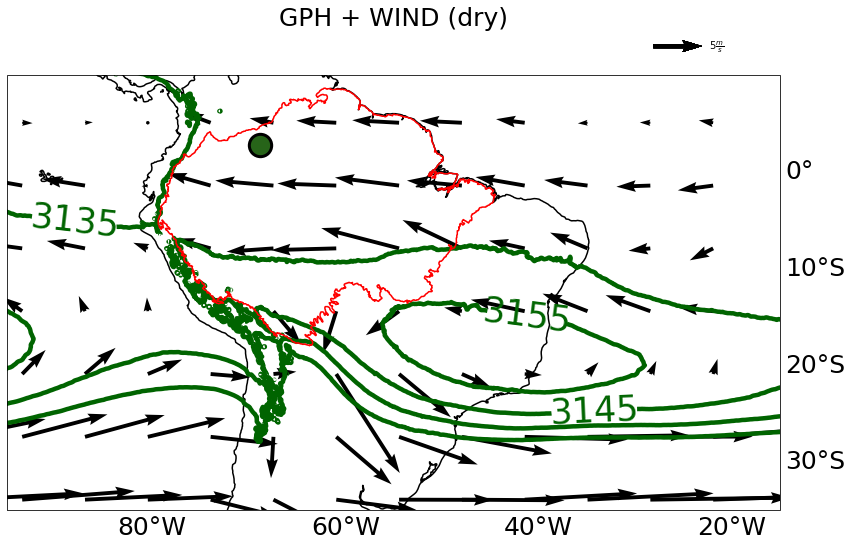

In [135]:
# CTL
plot_adv_gph('GPH + WIND (dry)', uas_ctl_mon_dry.sel(plev=70000), vas_ctl_mon_dry.sel(plev=70000), 65, 1.0, 
             zg_ctl_mon_dry.sel(plev=70000), False, zg_def_mon_dry.sel(plev=70000), 'darkgreen', 'purple', 3125, 3160, 10, -40, 15, -100, -10,
             True , sam_ctl_season_lati[0], sam_ctl_season_loni[0], right, False, sam_def_season_lati[1], sam_def_season_loni[1], left) # -60, 20, -100, -20 //-30, 20, -90, -30

In [18]:
# cont_var(title, data1, data2, color1, color2, varmin, varmax, step_level, lat_min, lat_max, lon_min, lon_max) 
def plot_gph(title, data1, plot2, data2, color1, color2, varmin, varmax, step_level, 
                    lat_min, lat_max, lon_min, lon_max):
    dset_bd = xr.open_dataset('/work/mh0731/m300948/AMDEF/REGRID_BC/masking_files/AMAZON_Biome.nc')
    AMZ_BD = dset_bd.AMAZON_BIOMES
    
    proj = ccrs.PlateCarree(central_longitude=180) # Create Mollweide projections
    fig  = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(111, projection=proj)
    
    minlon = lon_min + 5 + 180 #on
    maxlon = lon_max - 5 + 180 #on
    
    ax.set_extent([minlon,maxlon,lat_min+5,lat_max-5],proj) #on
    ax.coastlines(resolution='50m', linewidth=1.5, color='black')
    
    gl = ax.gridlines(draw_labels=True, linewidth=1.5, color='gray',
                        xlocs=range(-180,180,20), ylocs=range(-90,90,10), crs=ccrs.PlateCarree())
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style, gl.ylabel_style = {'fontsize': 25}, {'fontsize': 25}
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xlines = False
    gl.ylines = False
    
    # wind quiver
    
    #levels = np.arange(varmin, varmax + step_level, step_level)
    plot1 = data1.plot.contour(
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      #transform=proj,
                      cmap=color1,
                      vmin=varmin,
                      vmax=varmax,
                      #levels=step_level,
                      levels = np.arange(varmin, varmax + step_level, step_level),
                      linewidths=3.5,
                     # cbar_kwargs={'label': 'Surface Temperature [K]',
                     #              'extend': 'both',
                     #              'shrink': .5,
                     #              'orientation': 'horizontal'},
                      add_colorbar=False
                     )
    if plot2 == True: 
        plot2 = data2.plot.contour(
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      #transform=proj,
                      cmap=color2,
                      vmin=varmin,
                      vmax=varmax,
                      levels = np.arange(varmin, varmax + step_level, step_level),
                      linewidths=3.5,
                     # cbar_kwargs={'label': 'Surface Temperature [K]',
                     #              'extend': 'both',
                     #              'shrink': .5,
                     #              'orientation': 'horizontal'},
                      add_colorbar=False
                     )
    ax.clabel(plot2, inline=True, fontsize=25)
    ax.clabel(plot1, inline=True, levels=np.arange(varmin, varmax + step_level, step_level), fontsize=25)
    #ax.clabel(plot2, inline=True, fontsize=20)
    
    #vref = ax.quiverkey(vplot, 0.9, 0.905, 20,
    #                            r'$20 \frac{m}{s}$',
    #                            labelpos='E',
    #                        coordinates='figure', zorder=5)
    
    kw = {'levels':[-1], 'colors':['red'], 'linestyles':['solid']}
    plot_bd = AMZ_BD.plot.contour( 
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      **kw
                     )
    
    ax.set_title(title, y=1.1, fontsize=25)

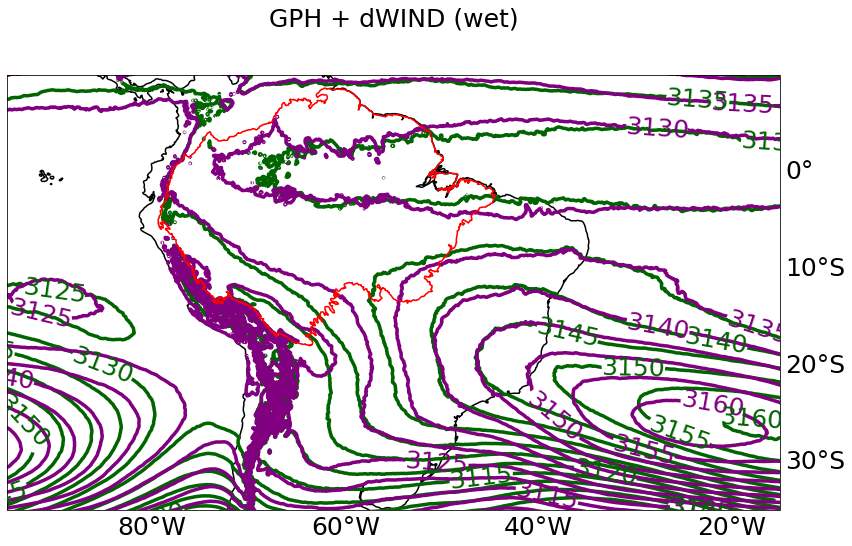

In [19]:
plot_gph('GPH + dWIND (wet)',
             zg_ctl_mon_wet.sel(plev=70000), True, zg_def_mon_wet.sel(plev=70000), 'darkgreen', 'purple', 3100, 3200, 5, -40, 15, -100, -10) # -60, 20, -100, -20 //-30, 20, -90, -30


In [86]:
# cont_var(title, data1, data2, color1, color2, varmin, varmax, step_level, lat_min, lat_max, lon_min, lon_max) 
def cplot_adv_gph(title, dset_uas, dset_vas, q_interval, scale, 
                  data1, plot2, data2, color1, color2, varmin, varmax, space, extend, 
                  lat_min, lat_max, lon_min, lon_max,
                  obj_1 , lati_1, loni_1, colors_1, obj_2, lati_2, loni_2, colors_2):
    
    dset_bd = xr.open_dataset('/work/mh0731/m300948/AMDEF/REGRID_BC/masking_files/AMAZON_Biome.nc')
    AMZ_BD = dset_bd.AMAZON_BIOMES
    
    proj = ccrs.PlateCarree(central_longitude=180) # Create Mollweide projections
    fig  = plt.figure(figsize=(16, 8))
    ax = fig.add_subplot(111, projection=proj)
    
    minlon = lon_min + 5 + 180 #on
    maxlon = lon_max - 5 + 180 #on
    
    ax.set_extent([minlon,maxlon,lat_min+5,lat_max-5],proj) #on
    ax.coastlines(resolution='50m', linewidth=1.5, color='black')
    
    gl = ax.gridlines(draw_labels=True, linewidth=1.5, color='gray',
                        xlocs=range(-180,180,20), ylocs=range(-90,90,10), crs=ccrs.PlateCarree())
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style, gl.ylabel_style = {'fontsize': 25}, {'fontsize': 25}
    gl.xlabels_top = False
    gl.ylabels_left = False
    gl.xlines = False
    gl.ylines = False
    
    # wind quiver
    vplot=ax.quiver(dset_uas.lon.values[::q_interval], dset_uas.lat.values[::q_interval], 
                    #dset_uas.drop('land_sea_mask').mean('time').isel(plev=vlevel).values[::q_interval], 
                    #dset_vas.drop('land_sea_mask').mean('time').isel(plev=vlevel).values[::q_interval],
                    dset_uas.values[::q_interval, ::q_interval], 
                    dset_vas.values[::q_interval, ::q_interval],
                    scale_units='xy',
                    scale=scale,
                    width=0.005,
                    angles='xy',
                    zorder=2,
                    transform=ccrs.PlateCarree())
    
    
    # contourf1        
    bounds = np.linspace(varmin,varmax, space)
    plot1 = data1.plot.contour(
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      #transform=proj,
                      cmap=color1,
                      vmin=varmin,
                      vmax=varmax,
                      add_colorbar=False,
                      #alpha = .5,
                      levels = bounds,
                      linewidths=3.5,
                      extend=extend
                     )
    
    # contourf2
    if plot2 == True: 
        bounds = np.linspace(varmin,varmax, space)
        plot = data2.plot(
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      #transform=proj,
                      cmap=color2,
                      vmin=varmin,
                      vmax=varmax,
                     # cbar_kwargs={'label': 'Surface Temperature [K]',
                     #              'extend': 'both',
                     #              'shrink': .5,
                     #              'orientation': 'horizontal'},
                     # alpha=.5,
                      add_colorbar=False, 
                      levels = bounds,
                      extend=extend
                     )
        bounds = np.linspace(varmin,varmax, space)
        cb = plt.colorbar(plot1, orientation="horizontal", fraction=0.05, pad=0.10, extend=extend,ticks=bounds, boundaries=bounds)
        #cb.set_label(label=label, size=15, weight='bold')
        cb.ax.tick_params(labelsize=20)
        cb.ax.set_xticklabels(bounds,rotation=270)
    
    #ax.clabel(plot2, inline=True, fontsize=25)
    #ax.clabel(plot1, inline=True, levels=np.arange(varmin, varmax + step_level, step_level), fontsize=25)
    #ax.clabel(plot2, inline=True, fontsize=20)
    
    #vref = ax.quiverkey(vplot, 0.9, 0.905, 20,
    #                            r'$20 \frac{m}{s}$',
    #                            labelpos='E',
    #                        coordinates='figure', zorder=5)
    ax.quiverkey(vplot, X=0.78, Y=0.93, U=5,
             label=r'$5 \frac{m}{s}$', labelpos='E',coordinates='figure')
    
    kw = {'levels':[-1], 'colors':['red'], 'linestyles':['solid']}
    plot_bd = AMZ_BD.plot.contour( 
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      **kw
                     )
    
    if obj_1 == True:
        plt.scatter(x=loni_1, y=lati_1, transform=ccrs.PlateCarree(), color=colors_1, marker='o', s=500, edgecolors='black', linewidth=3,zorder=2) #colors_b[i]
        
    if obj_2 == True:
        plt.scatter(x=loni_2, y=lati_2, transform=ccrs.PlateCarree(), color=colors_2, marker='o', s=500, edgecolors='black', linewidth=3,zorder=2) #colors_b[i]
    
    ax.set_title(title, y=1.1, fontsize=25)

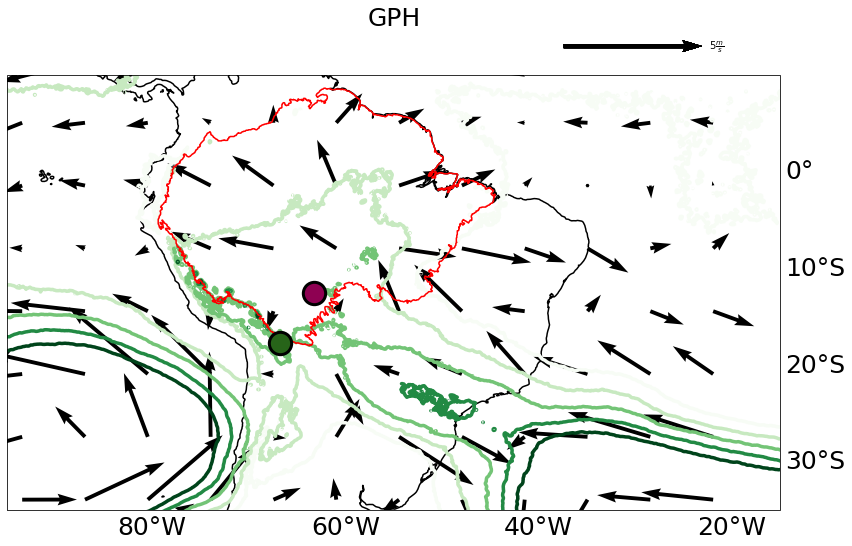

In [103]:
# cplot_adv_gph(title, dset_uas, dset_vas, q_interval, scale, 
#                  data1, plot2, data2, color1, color2, varmin, varmax, space, extend, 
#                  lat_min, lat_max, lon_min, lon_max,
#                  obj_1 , lati_1, loni_1, colors_1, obj_2, lati_2, loni_2, colors_2)
                  
cplot_adv_gph('GPH', uas_def_mon_dry.sel(plev=70000)-uas_ctl_mon_dry.sel(plev=70000), vas_def_mon_dry.sel(plev=70000)-vas_ctl_mon_dry.sel(plev=70000), 65, 0.35, 
                  zg_def_mon_dry.sel(plev=70000)-zg_ctl_mon_dry.sel(plev=70000), False, zg_def_mon_dry.sel(plev=70000), cm.Greens ,cm.cool, 0, 10, 5, 'max', 
                  -40, 15, -100, -10,
                  True , sam_ctl_season_lati[1], sam_ctl_season_loni[1], right, True, sam_def_season_lati[1], sam_def_season_loni[1], left)

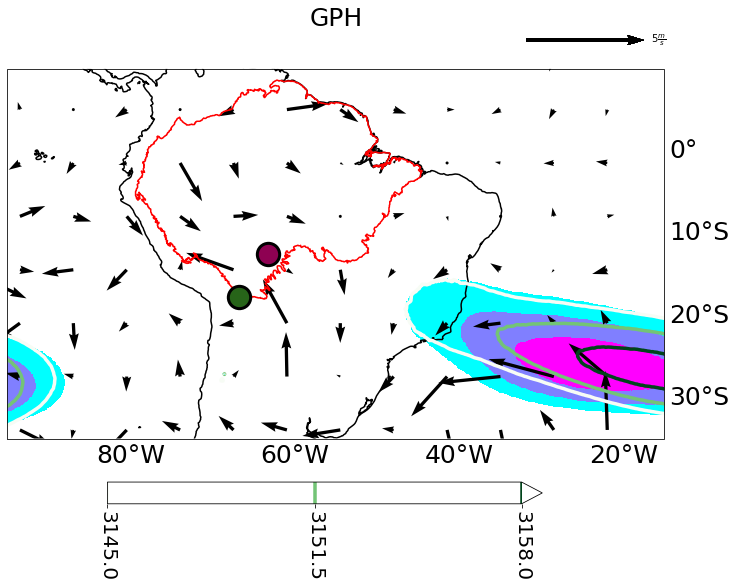

In [94]:
# cplot_adv_gph(title, dset_uas, dset_vas, q_interval, scale, 
#                  data1, plot2, data2, color1, color2, varmin, varmax, space, extend, 
#                  lat_min, lat_max, lon_min, lon_max,
#                  obj_1 , lati_1, loni_1, colors_1, obj_2, lati_2, loni_2, colors_2)
                  
cplot_adv_gph('GPH', uas_def_mon_wet.sel(plev=70000)-uas_ctl_mon_wet.sel(plev=70000), vas_def_mon_wet.sel(plev=70000)-vas_ctl_mon_wet.sel(plev=70000), 65, 0.35, 
                  zg_ctl_mon_wet.sel(plev=70000), True, zg_def_mon_wet.sel(plev=70000), cm.Greens ,cm.cool, 3145, 3158, 3, 'max', 
                  -40, 15, -100, -10,
                  True , sam_ctl_season_lati[1], sam_ctl_season_loni[1], right, True, sam_def_season_lati[1], sam_def_season_loni[1], left)

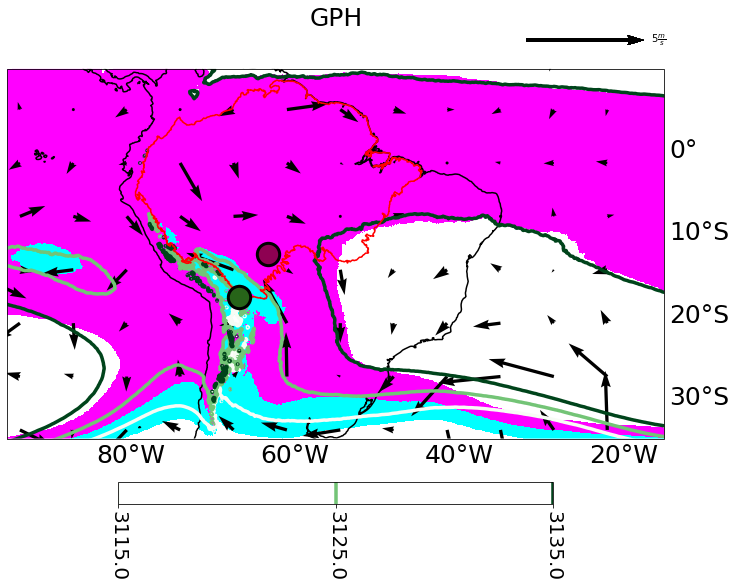

In [98]:
# cplot_adv_gph(title, dset_uas, dset_vas, q_interval, scale, 
#                  data1, plot2, data2, color1, color2, varmin, varmax, space, extend, 
#                  lat_min, lat_max, lon_min, lon_max,
#                  obj_1 , lati_1, loni_1, colors_1, obj_2, lati_2, loni_2, colors_2)
                  
cplot_adv_gph('GPH', uas_def_mon_wet.sel(plev=70000)-uas_ctl_mon_wet.sel(plev=70000), vas_def_mon_wet.sel(plev=70000)-vas_ctl_mon_wet.sel(plev=70000), 65, 0.35, 
                  zg_ctl_mon_wet.sel(plev=70000), True, zg_def_mon_wet.sel(plev=70000), cm.Greens ,cm.cool, 3115, 3135, 3, 'neither', 
                  -40, 15, -100, -10,
                  True , sam_ctl_season_lati[1], sam_ctl_season_loni[1], right, True, sam_def_season_lati[1], sam_def_season_loni[1], left)

Text(0.5, 1.1, 'GPH + dWIND (dry)')

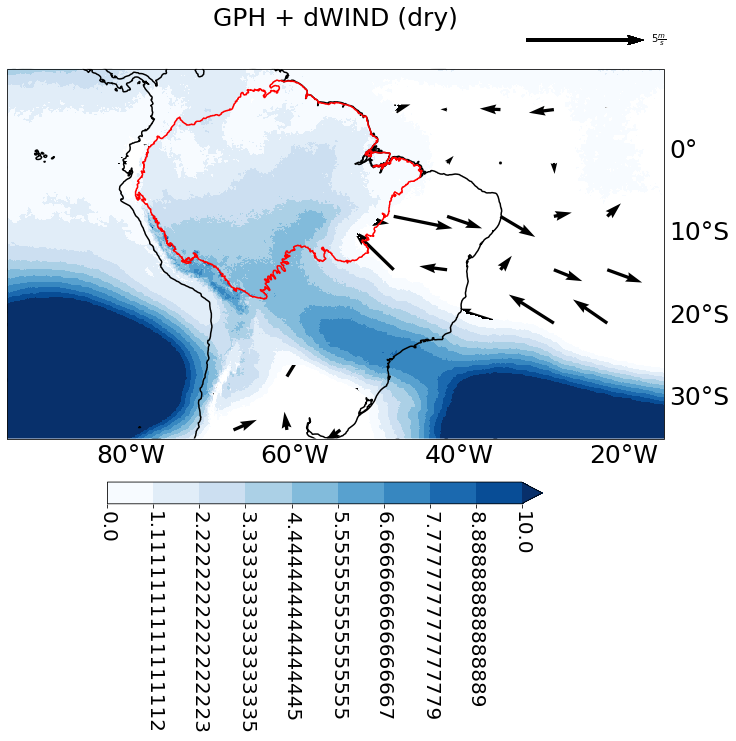

In [55]:
# cont_var(title, data1, data2, color1, color2, varmin, varmax, step_level, lat_min, lat_max, lon_min, lon_max) 
#def cplot_adv_gph(title, dset_uas, dset_vas, q_interval, scale, 
#                  data1, plot2, data2, color1, color2, varmin, varmax, space, extend, 
#                  lat_min, lat_max, lon_min, lon_max,
#                  obj_1 , lati_1, loni_1, colors_1, obj_2, lati_2, loni_2, colors_2):

dset_uas = uas_def_mon_dry.sel(plev=70000)-uas_ctl_mon_dry.sel(plev=70000)
dset_vas = vas_def_mon_dry.sel(plev=70000)-vas_ctl_mon_dry.sel(plev=70000)    
q_interval = 65
scale = 0.35
lat_min = -40
lat_max = 15
lon_min = -100
lon_max = -10

dset_zg = zg_def_mon_dry.sel(plev=70000) - zg_ctl_mon_dry.sel(plev=70000)


dset_bd = xr.open_dataset('/work/mh0731/m300948/AMDEF/REGRID_BC/masking_files/AMAZON_Biome.nc')
AMZ_BD = dset_bd.AMAZON_BIOMES
    
proj = ccrs.PlateCarree(central_longitude=180) # Create Mollweide projections
fig  = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection=proj)
    
minlon = lon_min + 5 + 180 #on
maxlon = lon_max - 5 + 180 #on
    
ax.set_extent([minlon,maxlon,lat_min+5,lat_max-5],proj) #on
ax.coastlines(resolution='50m', linewidth=1.5, color='black')
    
gl = ax.gridlines(draw_labels=True, linewidth=1.5, color='gray',
                        xlocs=range(-180,180,20), ylocs=range(-90,90,10), crs=ccrs.PlateCarree())
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style, gl.ylabel_style = {'fontsize': 25}, {'fontsize': 25}
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = False
gl.ylines = False
    
# wind quiver
vplot=ax.quiver(dset_uas.lon.values[::q_interval], dset_uas.lat.values[::q_interval], 
                    #dset_uas.drop('land_sea_mask').mean('time').isel(plev=vlevel).values[::q_interval], 
                    #dset_vas.drop('land_sea_mask').mean('time').isel(plev=vlevel).values[::q_interval],
                    dset_uas.values[::q_interval, ::q_interval], 
                    dset_vas.values[::q_interval, ::q_interval],
                    scale_units='xy',
                    scale=scale,
                    width=0.005,
                    angles='xy',
                    transform=ccrs.PlateCarree())
    
# contourf1  
color1 = cm.Blues
varmin = 0
varmax = 10
space = 11
extend='max'

bounds = np.linspace(varmin,varmax, space)
plot1 = dset_zg.plot(
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      #transform=proj,
                      cmap=color1,
                      vmin=varmin,
                      vmax=varmax,
                      add_colorbar=False,
                      #alpha = .5,
                      levels = bounds,
                      extend=extend
                     )

cb = plt.colorbar(plot1, orientation="horizontal", fraction=0.05, pad=0.10, extend=extend,ticks=bounds, boundaries=bounds)
#cb.set_label(label=label, size=15, weight='bold')
cb.ax.tick_params(labelsize=20)
cb.ax.set_xticklabels(bounds,rotation=270)

ax.quiverkey(vplot, X=0.78, Y=0.93, U=5,
             label=r'$5 \frac{m}{s}$', labelpos='E',coordinates='figure')
    
kw = {'levels':[-1], 'colors':['red'], 'linestyles':['solid']}
plot_bd = AMZ_BD.plot.contour( 
                      ax=ax,
                      transform=ccrs.PlateCarree(),
                      **kw
                     )
    
#if obj_1 == True:
#    plt.scatter(x=loni_1, y=lati_1, transform=ccrs.PlateCarree(), color=colors_1, marker='o', s=500, edgecolors='black', linewidth=3,zorder=2) #colors_b[i]
        
#if obj_2 == True:
#    plt.scatter(x=loni_2, y=lati_2, transform=ccrs.PlateCarree(), color=colors_2, marker='o', s=500, edgecolors='black', linewidth=3,zorder=2) #colors_b[i]
    
title = 'GPH + dWIND (dry)'
ax.set_title(title, y=1.1, fontsize=25)